<a id = 'top'></a>

# INDEX


df  = roadAccStats13-16.csv

df1 = Details_of_road_accident_deaths_by_situation_state_2014.csv

df2 = reasonOfAccident.csv

df3 = timeOfOccurence.csv

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
import xlrd
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [51]:
df = pd.read_csv('roadAccStats13-16.csv')

In [52]:
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [53]:
plt.rcParams['figure.figsize'] = [10, 5]

In [54]:
jtplot.style()
jtplot.style(theme = 'onedork')
jtplot.style(context = 'talk', fscale = 1.4, spines = False, gridlines = '--')
jtplot.style(ticks = True, grid = False, figsize=(6, 4.5))
jtplot.reset()

df dataset tells about the **road accidents counts in each stage for years 2013 to 2016.**


In [55]:
df.head()

SI. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                            43482.0            
1                                              308.0            
2                                             7211.0            
3                                            10200.0            
4                                            13657.0            

   State/UT-Wise Total Number of Road Accidents during - 2014  \
0                                              24440            
1                                                205            
2                                               7144            
3                                               9556            
4                                              13821            

   State/UT-Wise Total Number of Road Accidents during - 2015  \
0                                              24258            
1                                                284            
2                                               6959            
3                                               9555            
4                                              14446            

   State/UT-Wise Total Number of Road Accidents during - 2016  \
0                                              24888            
1                                                249            
2                                               7435            
3                                               8222            
4                                              13580            

   Share of States/UTs in Total Number of Road Accidents - 2013  \
0                                                8.9              
1                                                0.1              
2                                                1.5              
3                                                2.1              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2014  \
0                                                5.0              
1                                                0.0              
2                                                1.5              
3                                                2.0              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2015  \
0                                                4.8              
1                                                0.1              
2                                                1.4              
3                                                1.9              
4                                                2.9              

   Share of States/UTs in Total Number of Road Accidents - 2016  \
0                                                5.2              
1                                                0.1              
2                                                1.5              
3                                                1.7              
4                                                2.8              

   Total Number of Accidents Per Lakh Population - 2013  \
0                                               50.4      
1                                               24.3      
2                                               23.0      
3                                               10.2      
4                                               54.8      

   Total Number of Accidents Per Lakh Population - 2014  \
0                                               28.1      
1                                               16.0      
2                                               22.5      
3                                         

In [56]:
df.shape

(37, 20)

In [57]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [58]:
type(df['SI. No.'][0])

str

In [59]:
type(df['States/UTs'][0])

str

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

### Calculating the Usefulness of colums.

In [61]:
row, column = df.shape

In [62]:
# CALCULATE Usefullness of columns
round(((row - df.isnull().sum())/ row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [63]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

Check for repeatition of values.

In [64]:
df['States/UTs'].value_counts()

States/UTs
Andhra Pradesh               1
Odisha                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttarakhand                  1
Uttar Pradesh                1
West Bengal                  1
Andaman & Nicobar Islands    1
Chandigarh                   1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Lakshadweep                  1
Puducherry                   1
Punjab                       1
Nagaland                     1
Arunachal Pradesh            1
Mizoram                      1
Assam                        1
Bihar                        1
Chhattisgarh                 1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal Pradesh             1
Jammu & Kashmir              1
Jharkhand                    1
Karnataka                    1
Kerala                      

**No repeatition present.**


#------------------------------------------------------------------------------------------------------#

*df1* dataset shows **vehicle types involved in accidents around the country.**


In [65]:
df1.head()

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [66]:
df1['CrimeHead'].unique()
df1['CrimeHead'].nunique()

37

In [67]:
df1.shape

(1443, 11)

In [68]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   int64 
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [70]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

#--------------------------------------------------------------------#

*** 
<a id='df'></a>
[Go to top](#top)
# DF - 
This dataset is about **Number of accidents** per state, accidents sharing multiple states and TOTAL number of accidents overall 
per year per state.
### Calculating the mean of State wise Total number of Road Accidents.

In [71]:
mean13 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents happened in all states in year 2013: {}".format(mean13))

Mean of accidents happened in all states in year 2013: 27026.444444444445


In [72]:
mean14 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents happened in all states in year 2014 : {}".format(mean14))

Mean of accidents happened in all states in year 2014 : 26454.054054054053


In [73]:
mean15 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents happened in all states in year 2015 : {}".format(mean15))

Mean of accidents happened in all states in year 2015 : 27103.945945945947


In [74]:
mean16 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents happened in all states in 2016 {}".format(mean16))

Mean of accidents happened in all states in 2016 25981.18918918919


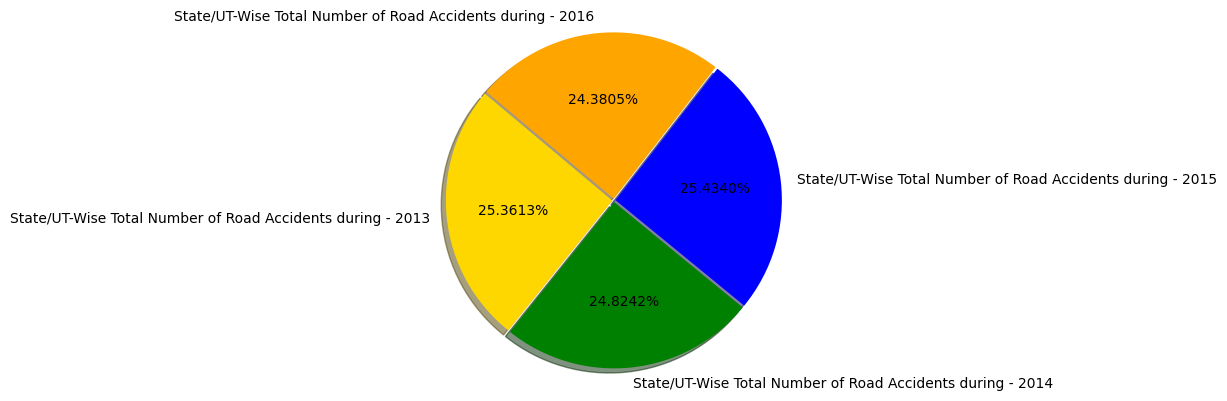

In [75]:
labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [mean13, mean14, mean15, mean16]
colors = ['gold', 'green', 'blue', 'orange']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plt.axis('equal')
plt.show()

It is clearly visible that, the percentage of road accidents are **almost constant during all years.**
It indicates that the government is making less efforts to prevent accidents by creating wider, good quality roads or creating new safety rules.

### Calculating mean of total number of accidents per lakh population over the years.

In [76]:
acc13 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 : {}".format(acc13))

Mean of accidents per lakh population in 2013 : 41.91111111111111


In [77]:
acc14 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2014 : {}".format(acc14))

Mean of accidents per lakh population in 2014 : 39.87777777777777


In [78]:
acc15 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2015 : {}".format(acc15))

Mean of accidents per lakh population in 2015 : 40.83333333333332


In [79]:
acc16 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2016 : {}".format(acc16))

Mean of accidents per lakh population in 2016 : 39.63611111111111


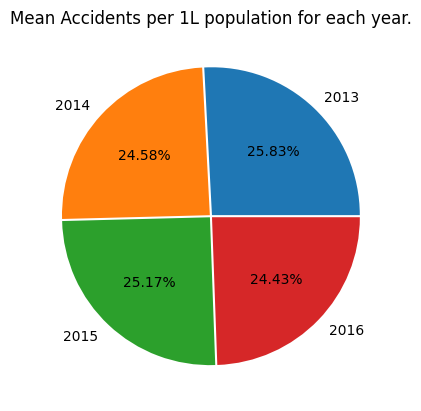

In [80]:
labels = ('2013','2014','2015','2016')
explode = (0.01,0.01,0.01,0.01)
performance = [acc13, acc14, acc15, acc16]
plt.pie(performance, labels = labels, autopct = '%.2f%%', center = (0,0), explode = explode )
plt.title("Mean Accidents per 1L population for each year.")
plt.show()

A similar rate is obtained as previous.


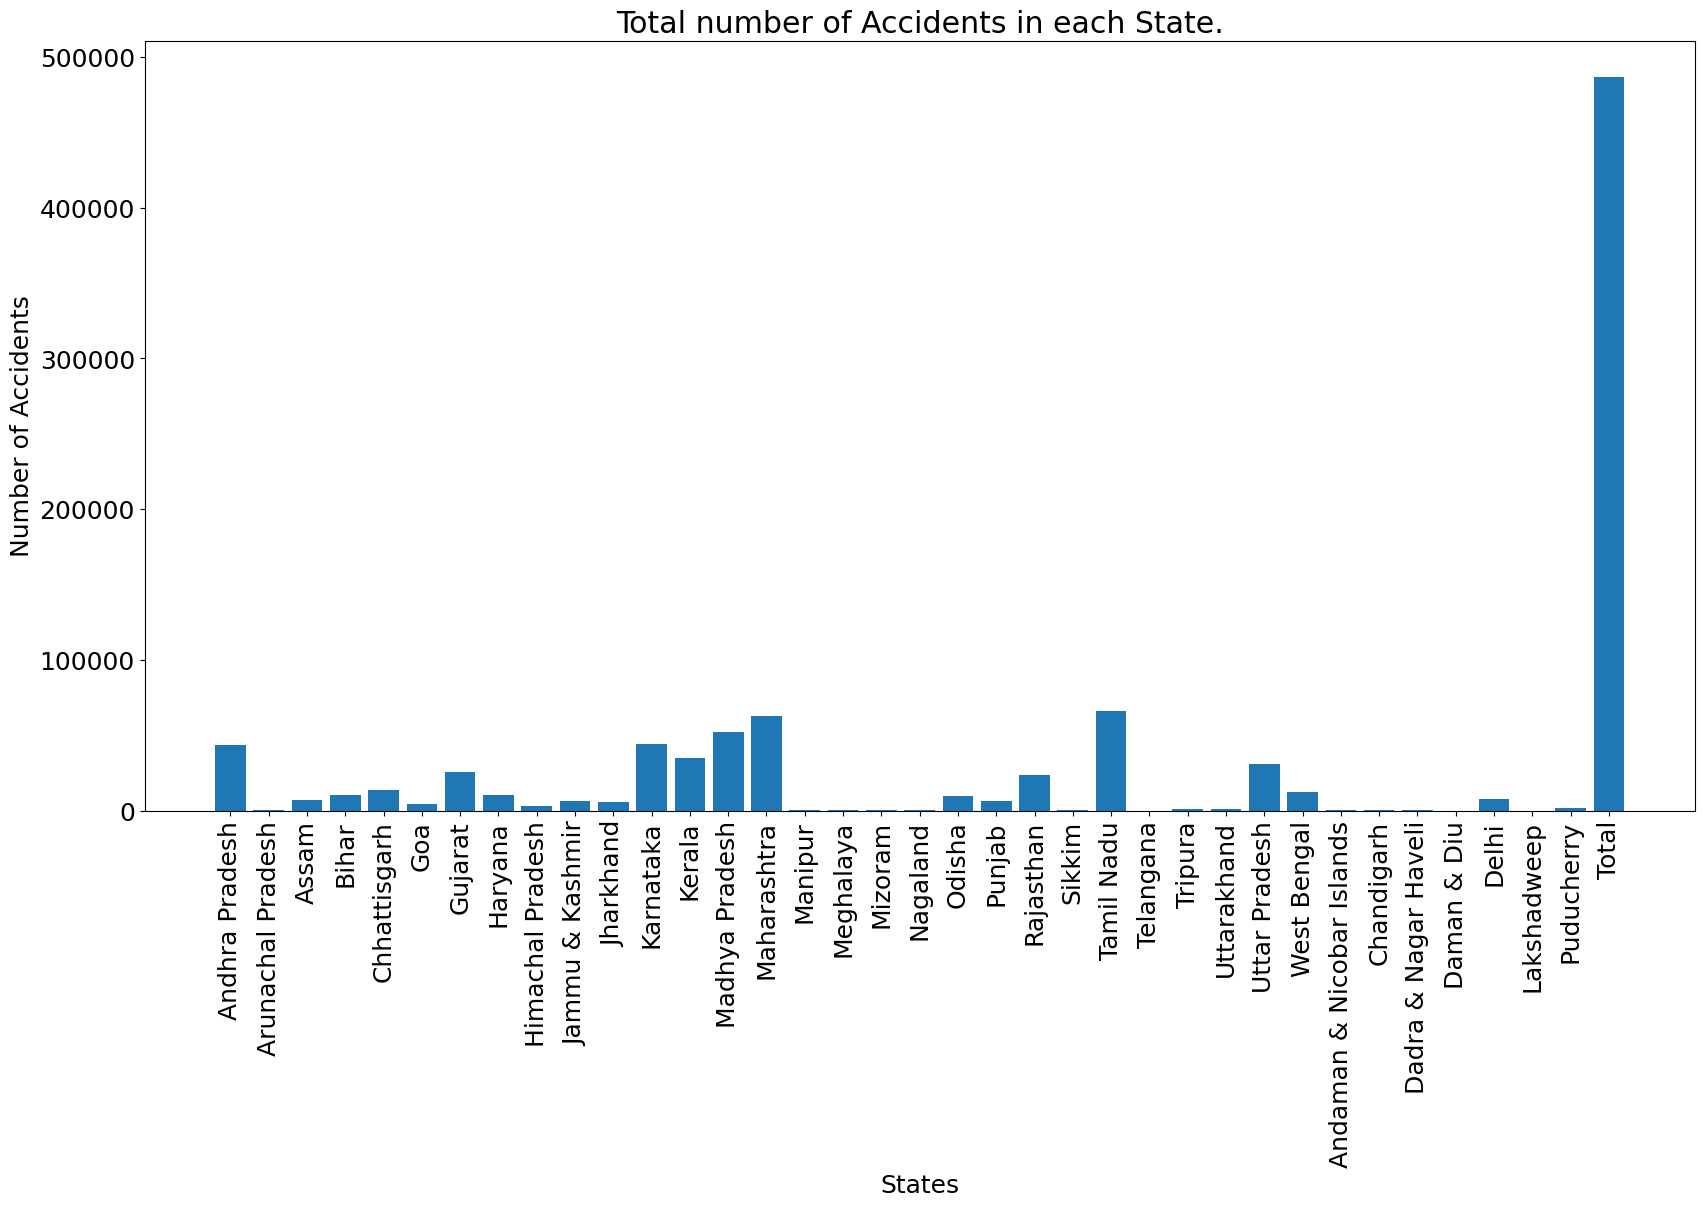

In [81]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
y = df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd = df['States/UTs']
p =df['States/UTs'].nunique()
d = np.linspace(1,p,p)   # refer notes
plt.bar(d, y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Total number of Accidents in each State.')
plt.show()

**Maharashtra** and **Tamil Nadu** have the highest number of accidents. Further investigation needs to be done to understand the case.
**Arunachal, Manipur, Meghalaya, Mizoram, Nagaland, Tripura** have the least number of accidents. They surprisingly all belong to the **north-eastern area.**


#### linspace()
y = linspace(x1,x2,n) generates n points. The spacing between the points is (x2-x1)/(n-1).

linspace is similar to the colon operator, “:”, but gives direct control over the number of points and always includes the endpoints. “lin” in the name “linspace” refers to generating linearly spaced values as opposed to the sibling function logspace, which generates logarithmically spaced values.

In [82]:
min13 = np.min(df['Total Number of Accidents Per Lakh Population - 2013'])
max13 = np.max(df['Total Number of Accidents Per Lakh Population - 2013'])

In [83]:
min14 = np.min(df['Total Number of Accidents Per Lakh Population - 2014'])
max14 = np.max(df['Total Number of Accidents Per Lakh Population - 2014'])

In [84]:
min15 = np.min(df['Total Number of Accidents Per Lakh Population - 2015'])
max15 = np.max(df['Total Number of Accidents Per Lakh Population - 2015'])

In [85]:
min16 = np.min(df['Total Number of Accidents Per Lakh Population - 2016'])
max16 = np.max(df['Total Number of Accidents Per Lakh Population - 2016'])

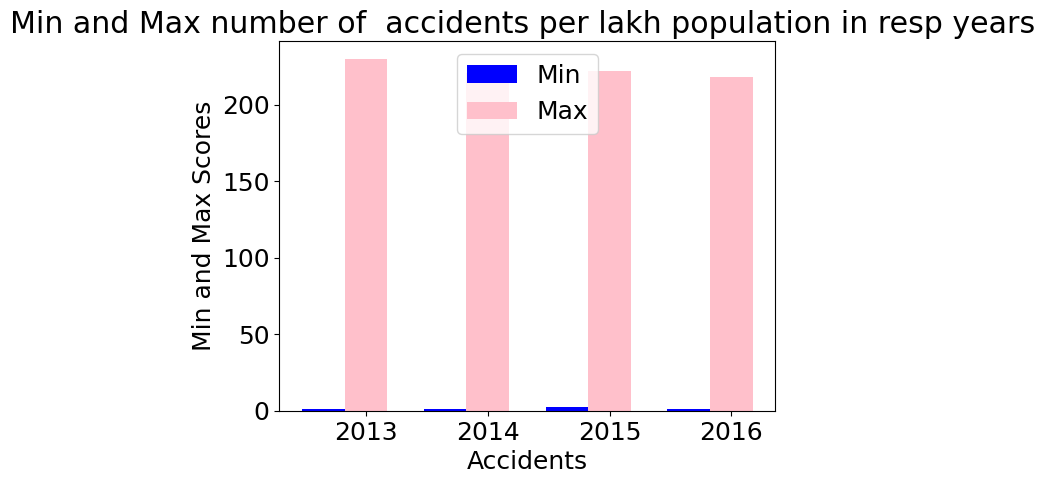

In [86]:
n = 4 
minx = (min13, min14, min15, min16)
maxx = (max13, max14, max15, max16)
index = np.arange(n)
bar_width = 0.35

r1 = plt.bar(index, minx, bar_width, align = 'center', color = 'b', label = 'Min')

r2 = plt.bar(index + bar_width, maxx, bar_width, align = 'center', color ='pink', label = 'Max')

plt.xlabel("Accidents")
plt.ylabel("Min and Max Scores")
plt.title("Min and Max number of  accidents per lakh population in resp years ")
plt.xticks(index + bar_width,('2013','2014','2015','2016'))
plt.legend(loc = 'upper center')
plt.show()

***
<a id='df1'></a>
[Go to top](#top)
## DF1 : 
This dataset shows the number of **offenders** and **victims** who died according to gender as well the as the total deaths.

In [87]:
df1.head(2)

States/UTs  Year                            CrimeHead  \
0  Andhra Pradesh  2014                  Truck/Lorry (Total)   
1  Andhra Pradesh  2014  Truck/Lorry - Normal Goods Carriers   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678

In [88]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [89]:
meanOffMale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

In [90]:
meanOffFemale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [91]:
meanOffTrans = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
meanOffTrans, meanOffMale, meanOffFemale

(0.0, 251.59251559251558, 21.717255717255718)

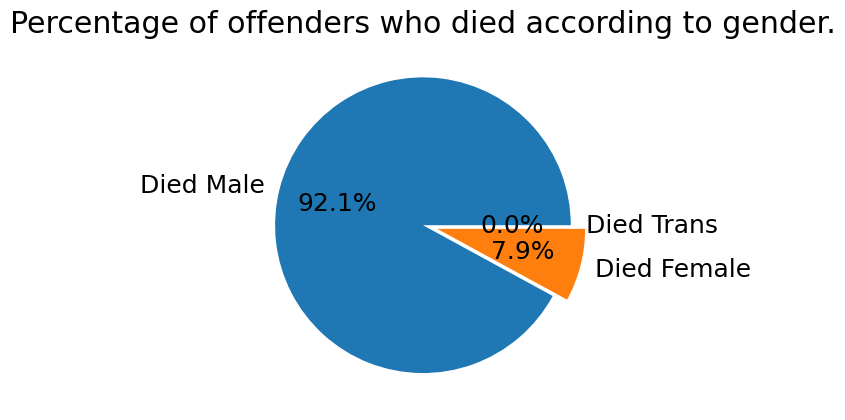

In [92]:
sizes = [meanOffMale, meanOffFemale, meanOffTrans]
labels = ['Died Male','Died Female', 'Died Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

### Victims who died according to gender.

In [93]:
meanVictMale = (np.mean(df1['Victims Died_Male']))

In [94]:
meanVictFemale = (np.mean(df1['Victims Died_Female']))

In [95]:
meanVictTrans = (np.mean(df1['Victims Died_Transgender']))
meanVictMale, meanVictFemale, meanVictTrans

(705.8731808731809, 138.59667359667358, 0.13513513513513514)

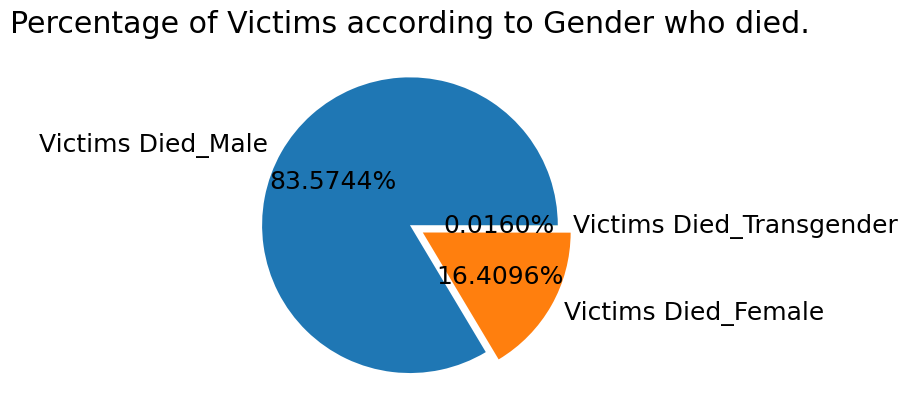

In [96]:
sizes = [meanVictMale, meanVictFemale, meanVictTrans]
labels = 'Victims Died_Male', 'Victims Died_Female', 'Victims Died_Transgender'
explode =(0, 0.1, 0)

plt.pie(sizes, labels = labels, explode = explode, autopct = '%.4f%%')
plt.title("Percentage of Victims according to Gender who died.")
plt.show()

In [97]:
meanOffTotal = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))
meanVictTotal = (np.mean(df1['Victims Died_Total']))
meanOffTotal, meanVictTotal

(273.3097713097713, 844.6049896049896)

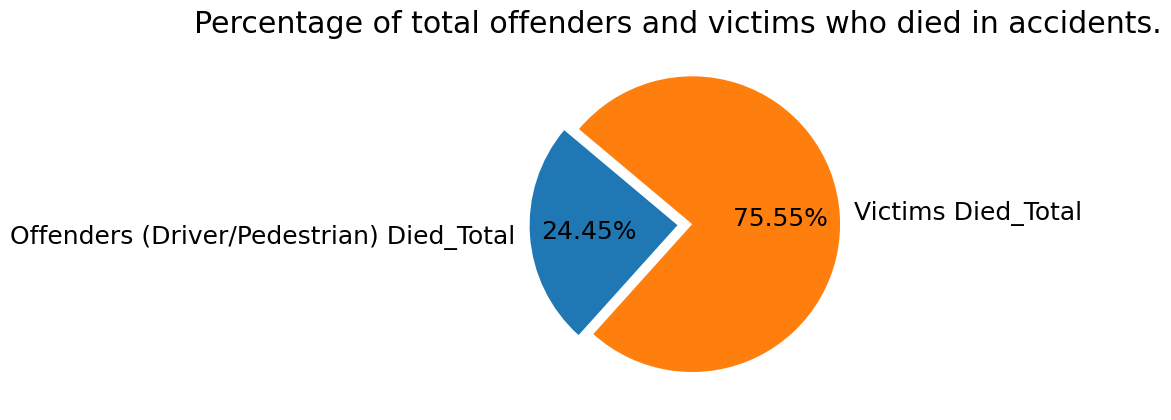

In [98]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [meanOffTotal, meanVictTotal]
explode = (0,0.1)
plt.title("Percentage of total offenders and victims who died in accidents.")
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.2f%%', startangle = 140)
plt.show()

*** 
<a id='df5'></a>
[Go to top](#top)
## DF5 -

This dataset states the count of accidents, deaths, injuries occured due to **various faults and reasons like Fault of Driver, weather condition, boulder, poor light etc.**

In [101]:
df5 = pd.read_csv('reasonOfAccident.csv')
df5.head()

Sl. No         States/UTs  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   
2      3              Assam   
3      4              Bihar   
4      5       Chhattisgarh   

   Fault of Driver-Total No. of Road Accidents - 2014  \
0                                            21359.0    
1                                               30.0    
2                                             6895.0    
3                                             5008.0    
4                                             9108.0    

   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                          40.753165                  
1                                           2.168058                  
2                                          22.095410                  
3                                           4.810784                  
4                                          35.654451                  

   Fault of Driver-Number of Persons-Killed - 2014  \
0                                             6743   
1                                               19   
2                                             2429   
3                                             2646   
4                                             2458   

   Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
0                                          12.865705               
1                                           1.373103               
2                                           7.783865               
3                                           2.541800               
4                                           9.622161               

   Fault of Driver-Number of Persons-Injured - 2014  \
0                                           26287.0   
1                                              30.0   
2                                            6281.0   
3                                            3374.0   
4                                            8710.0   

   Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
0                                          50.155834                
1                                           2.168058                
2                                          20.127813                
3                                           3.241131                
4                                          34.096428                

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
0                                              288.0                      
1                                               20.0                      
2                                                2.0                      
3                                              608.0                      
4                                              726.0                      

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
0                                           0.549507                                    
1                                           1.445372                                    
2                                           0.006409                                    
3                                           0.584057                                    
4                                           2.842021                                    

   ...  Falling of boulders-Number of Persons-Killed - 2014 per 1L people  \
0  ...                                           0.001908                   
1  ...                                           0.000000                   
2  ...                                           0.000000                   
3  ...                                           0.042267                   
4  ...                                           0.027402                   

   Falling of boulders-Number of Persons-Injured - 2014  \
0                                               12.0     

In [102]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Sl. No                                                                                 37 non-null     object 
 1   States/UTs                                                                             37 non-null     object 
 2   Fault of Driver-Total No. of Road Accidents - 2014                                     36 non-null     float64
 3   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                       36 non-null     float64
 4   Fault of Driver-Number of Persons-Killed - 2014                                        37 non-null     int64  
 5   Fault of Driver-Number of Persons-Killed - 2014 per 1L people                   

*Reasons for death due to Accidents :*
- Driver
- Other Driver's
- Pedestrian
- Condition of Vehicle
- Road Condition
- Weather Condition
- Passenger
- Poor Light
- Boulders
- Other Causes

#### IMPORTANT ERROR - 

*plt.bar valueerror: shape mismatch: objects cannot be broadcast to a single shape.*


[The solution.](https://stackoverflow.com/questions/48962594/unable-to-plot-double-bar-bar-plot-using-pyplot-for-ndarray).

In [103]:
driverFault = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
otherDriversFault = df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
pedestrianFault = df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
conditionOfVehicleFault = df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
roadConditionFault = df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
weatherConditionFault = df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
passengerFault = df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
poorLightFault = df5['Poor light-Number of Persons-Killed - 2014 per 1L people']
bouldersFault = df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
otherCauses = df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

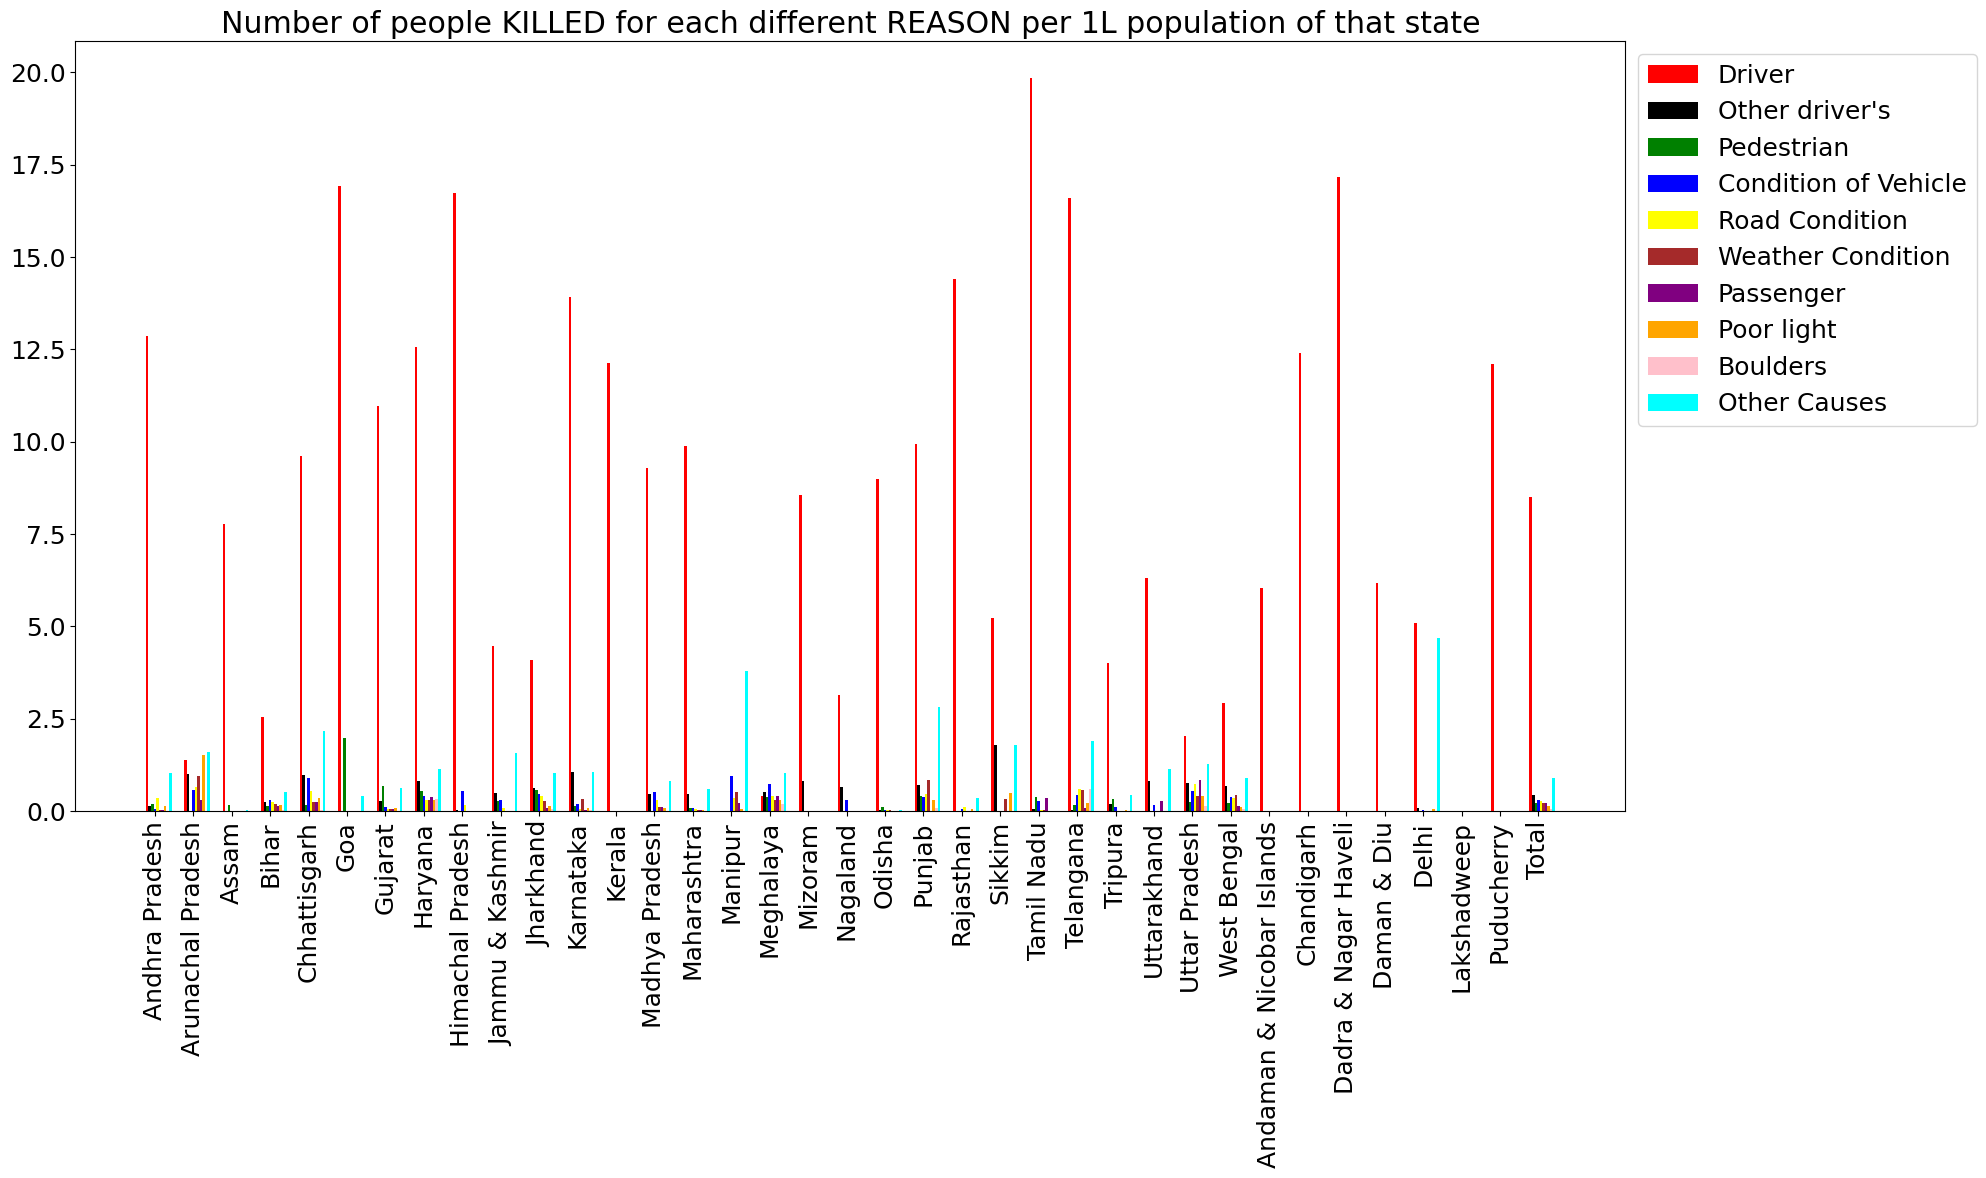

In [104]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3

plt.bar(UT-0.6, driverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT-0.4, otherDriversFault,width=0.2, color='black', align='center', label='Other driver\'s')
plt.bar(UT-0.2, pedestrianFault,width=0.2, color='g', align='center', label='Pedestrian')
plt.bar(UT, conditionOfVehicleFault,width=0.2, color='b', align='center', label='Condition of Vehicle')
plt.bar(UT+0.2, roadConditionFault,width=0.2, color='yellow', align='center', label='Road Condition')
plt.bar(UT+0.4, weatherConditionFault,width=0.2, color='brown', align='center', label='Weather Condition')
plt.bar(UT+0.6, passengerFault,width=0.2, color='purple', align='center', label='Passenger')
plt.bar(UT+0.8, poorLightFault,width=0.2, color='orange', align='center', label='Poor light')
plt.bar(UT+1.0, bouldersFault,width=0.2, color='pink', align='center', label='Boulders')
plt.bar(UT+1.2, otherCauses,width=0.2, color='cyan', align='center', label='Other Causes')

plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people KILLED for each different REASON per 1L population of that state")
plt.show()

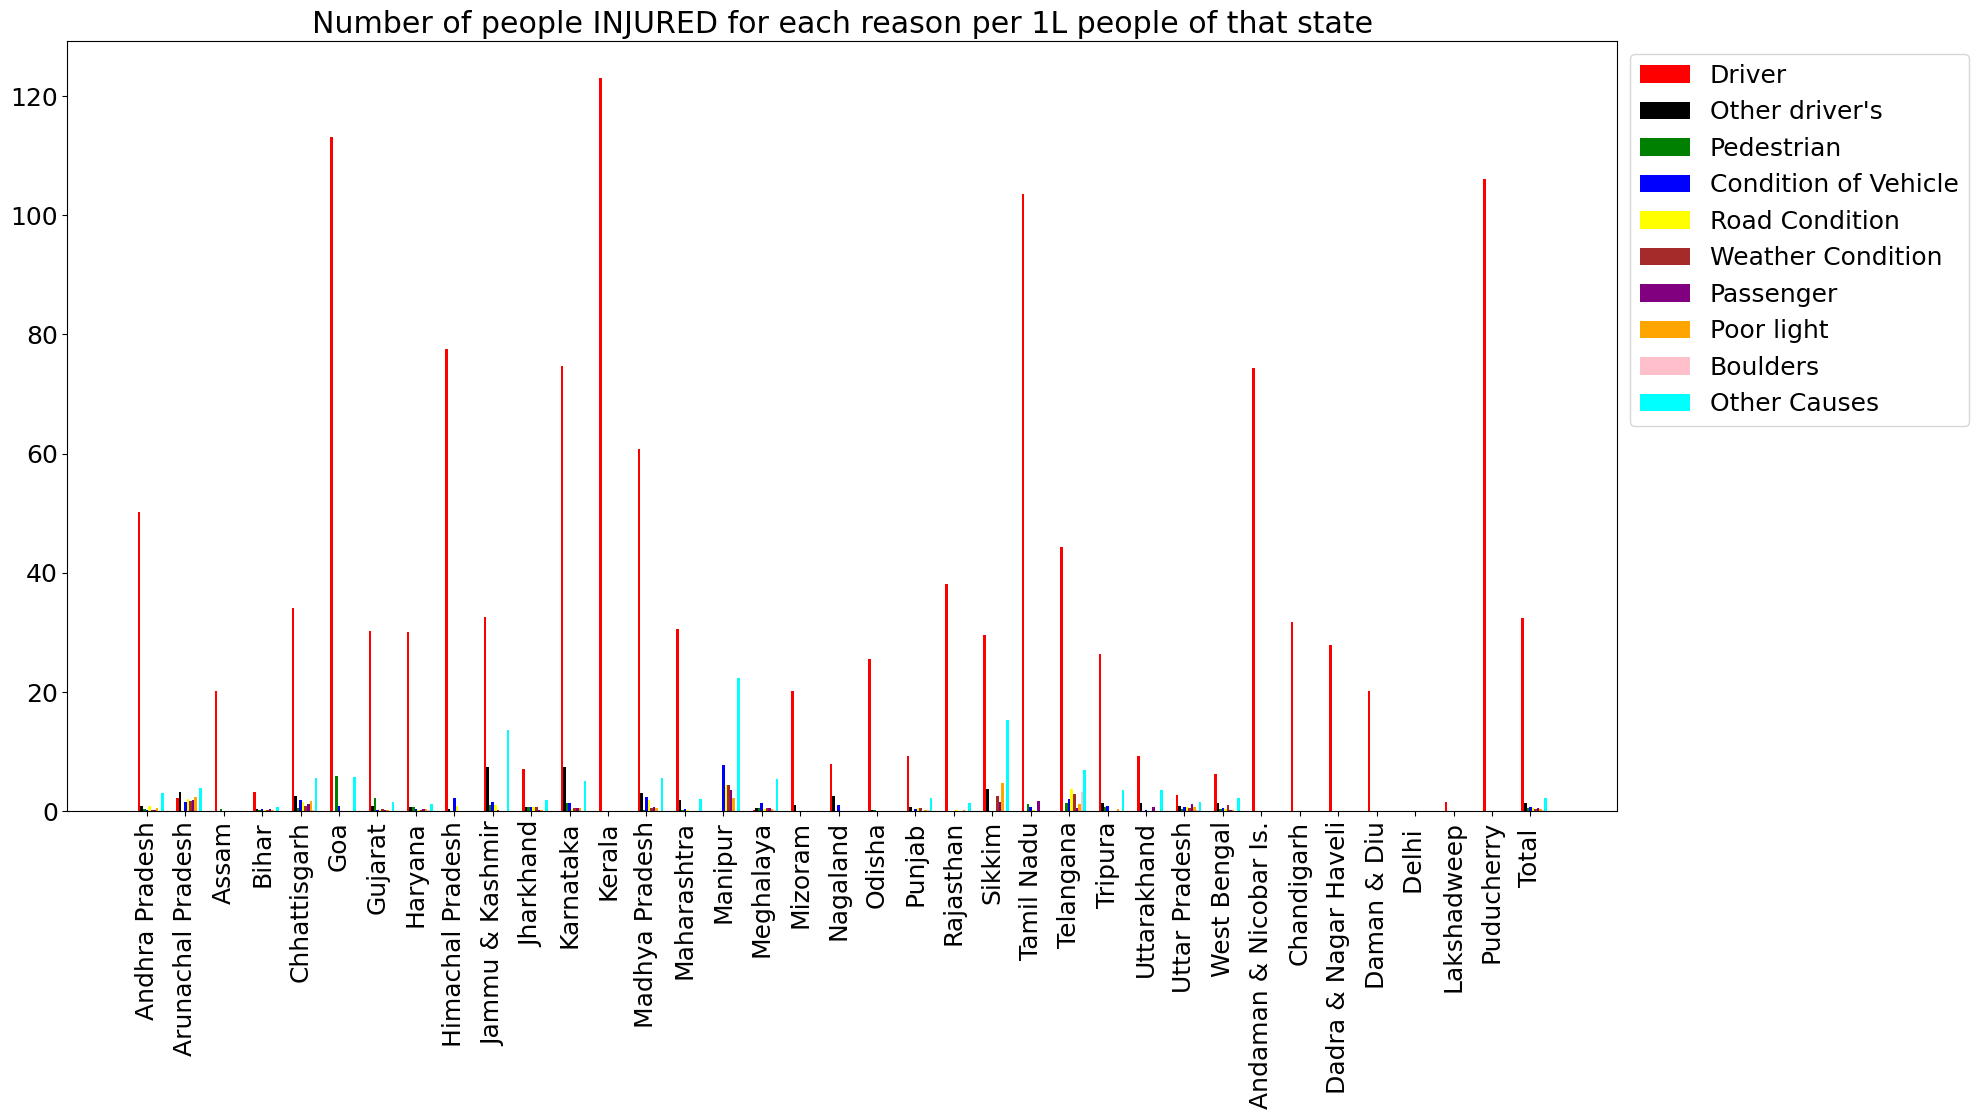

In [105]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6, df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4, df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2, df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT, df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2, df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4, df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6, df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8, df5['Poor light-Number of Persons-Injured - 2014 per 1L people'], width=0.2, color='orange',align='center',label='Poor light')
plt.bar(UT+1.0, df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2, df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people INJURED for each reason per 1L people of that state")
plt.show()

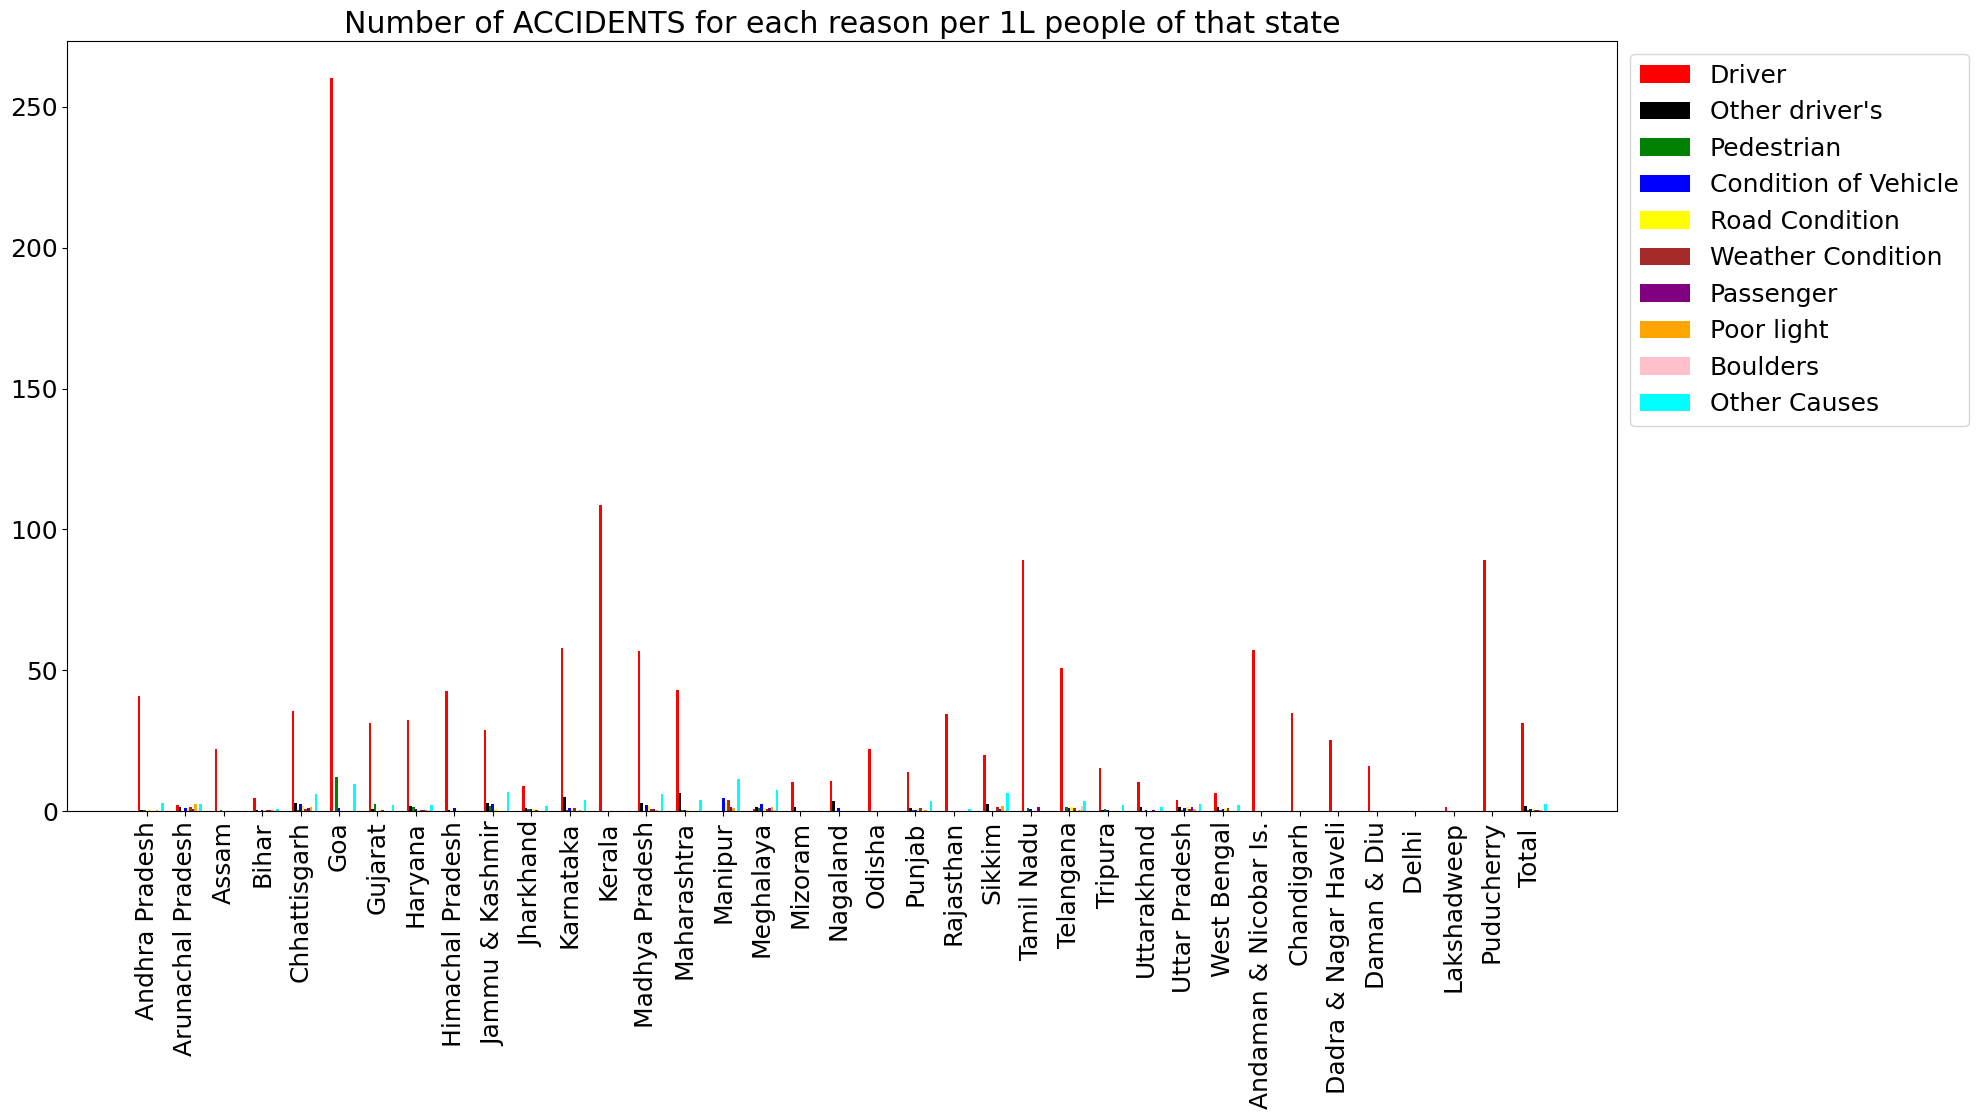

In [106]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of ACCIDENTS for each reason per 1L people of that state")
plt.show()

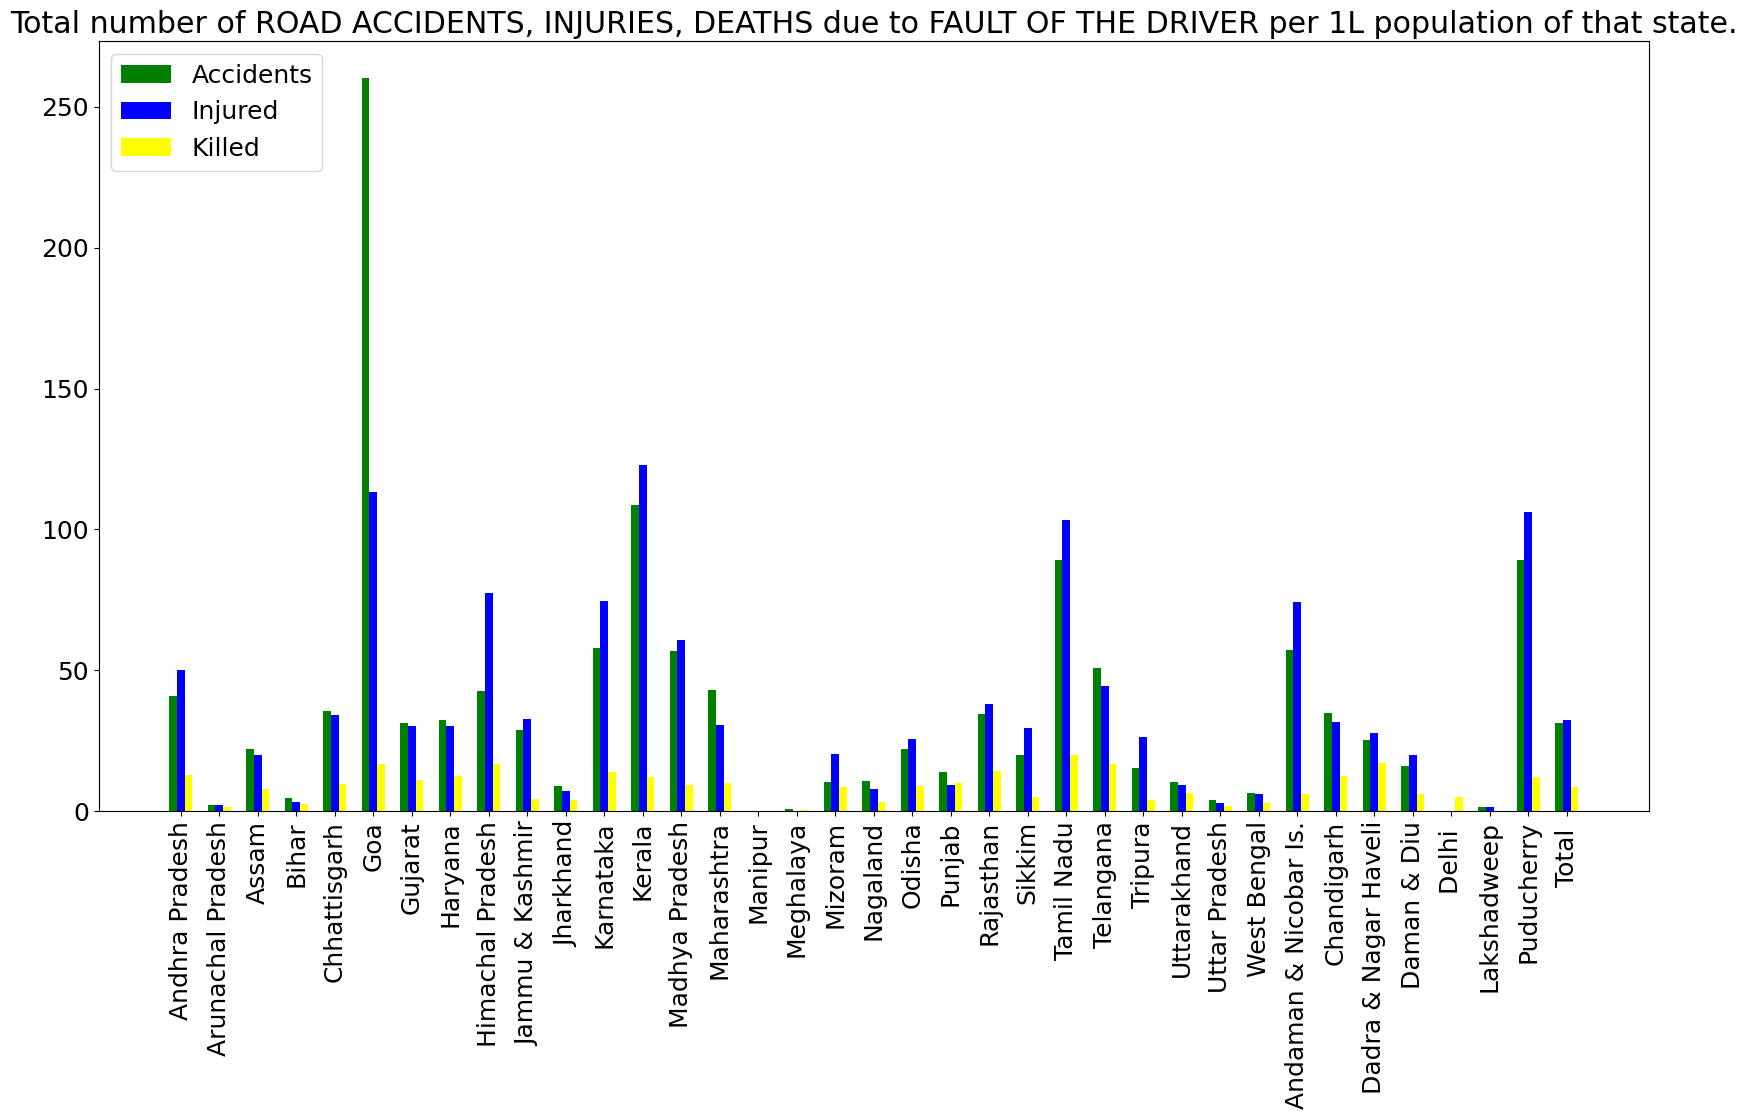

In [107]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.2,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.")
plt.show()

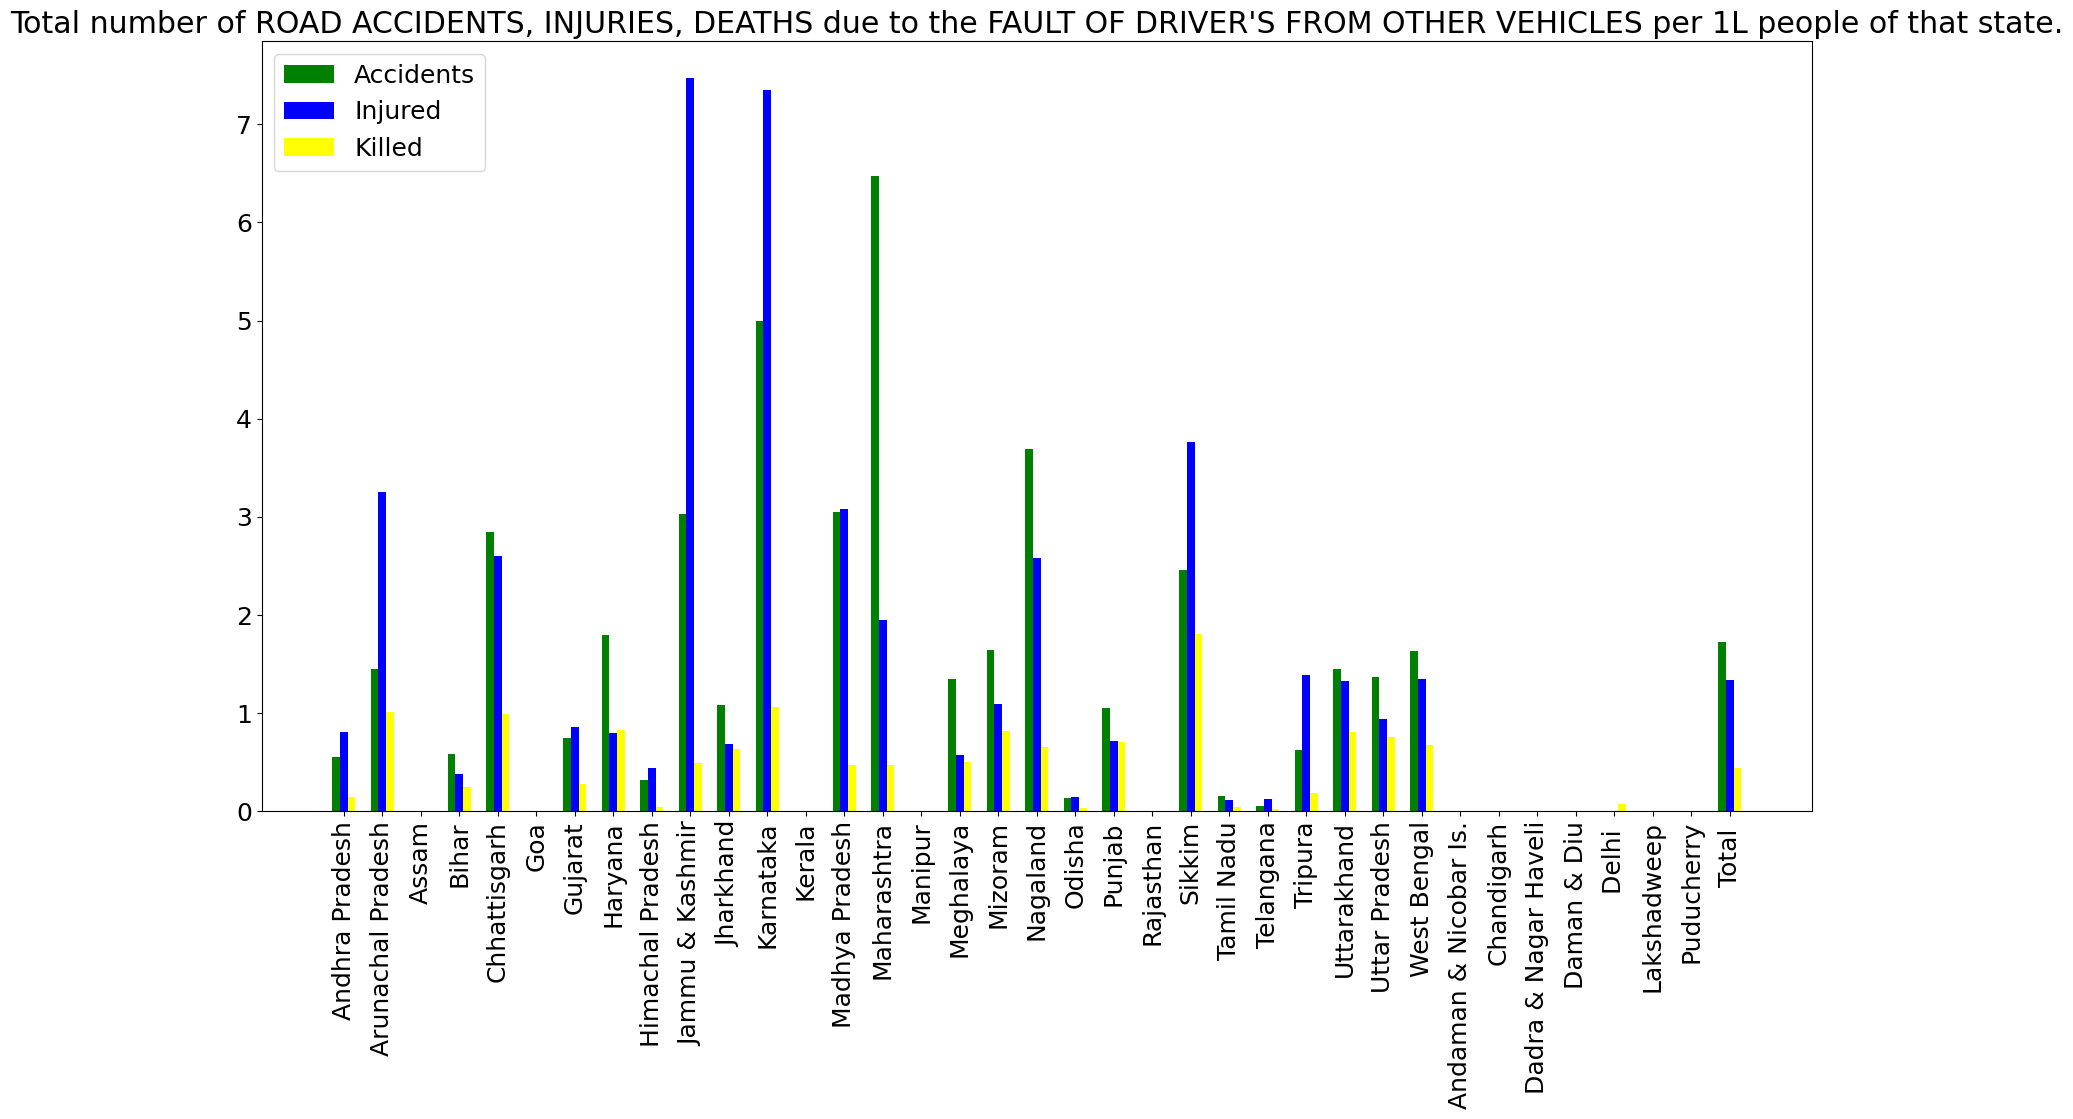

In [108]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.")
plt.show()

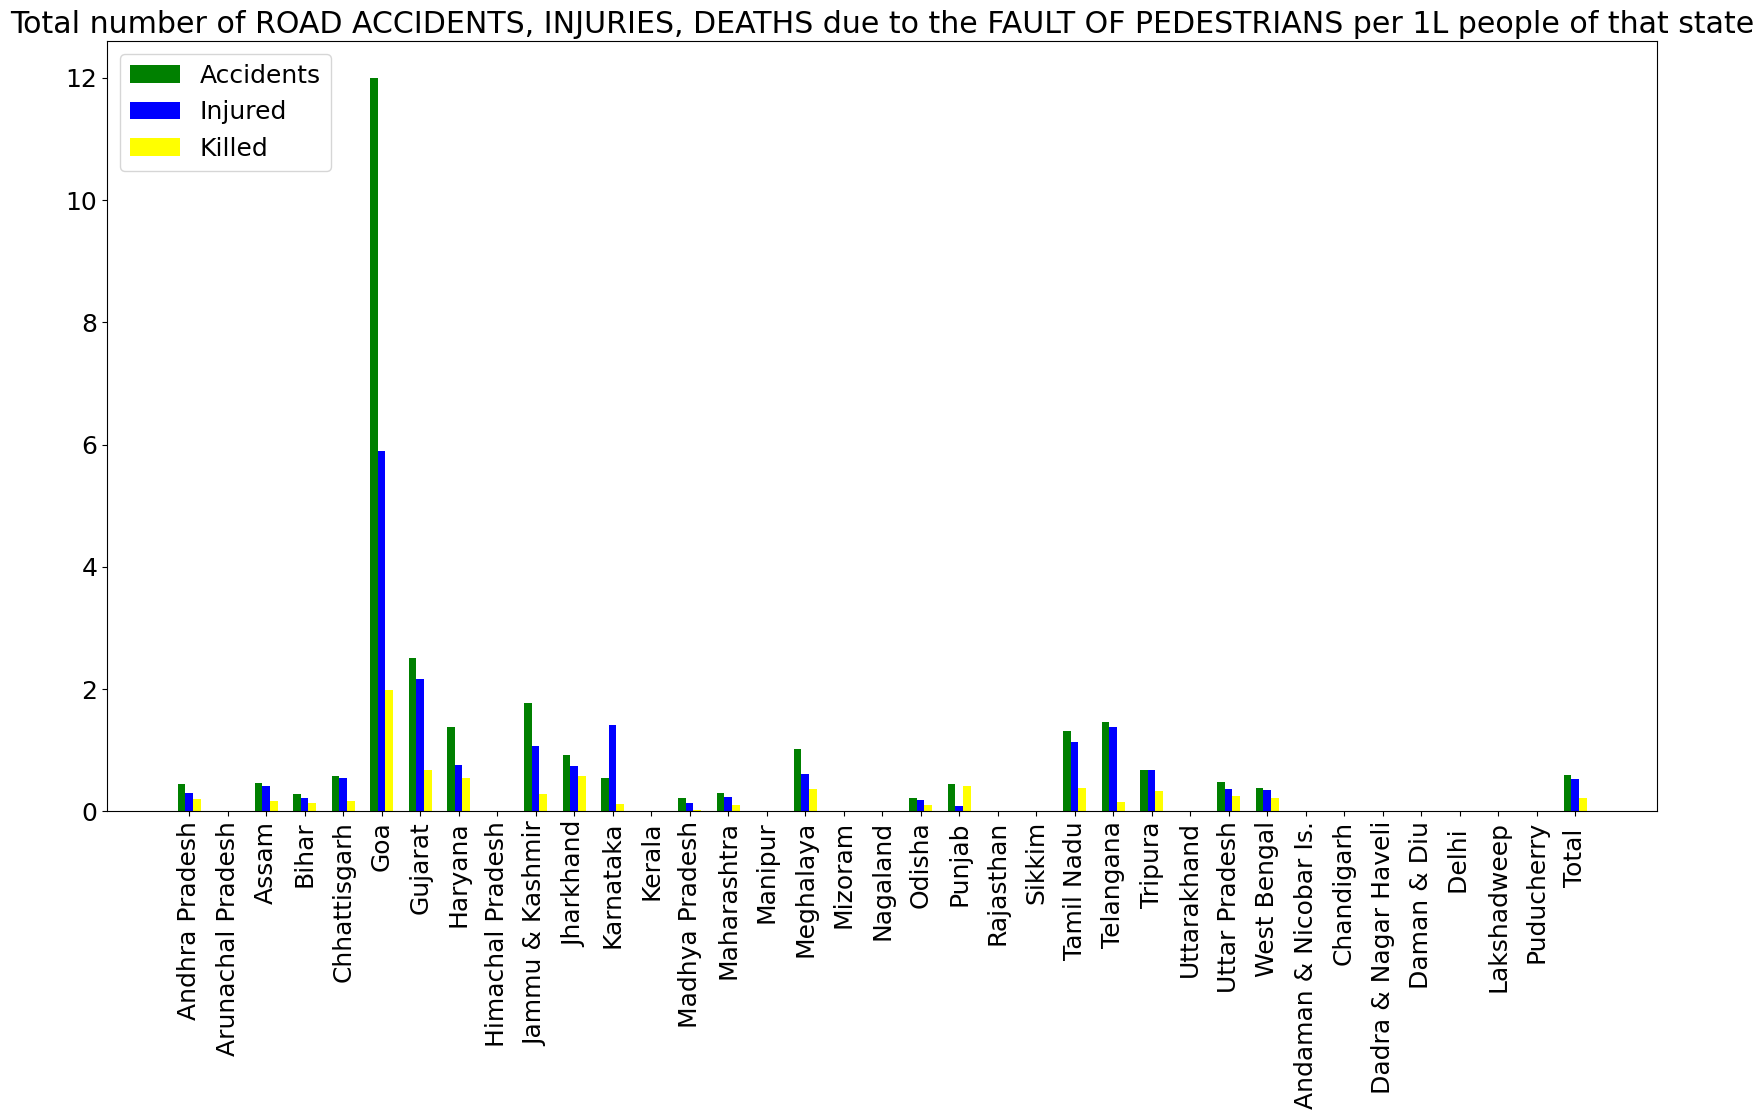

In [109]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state")
plt.show()

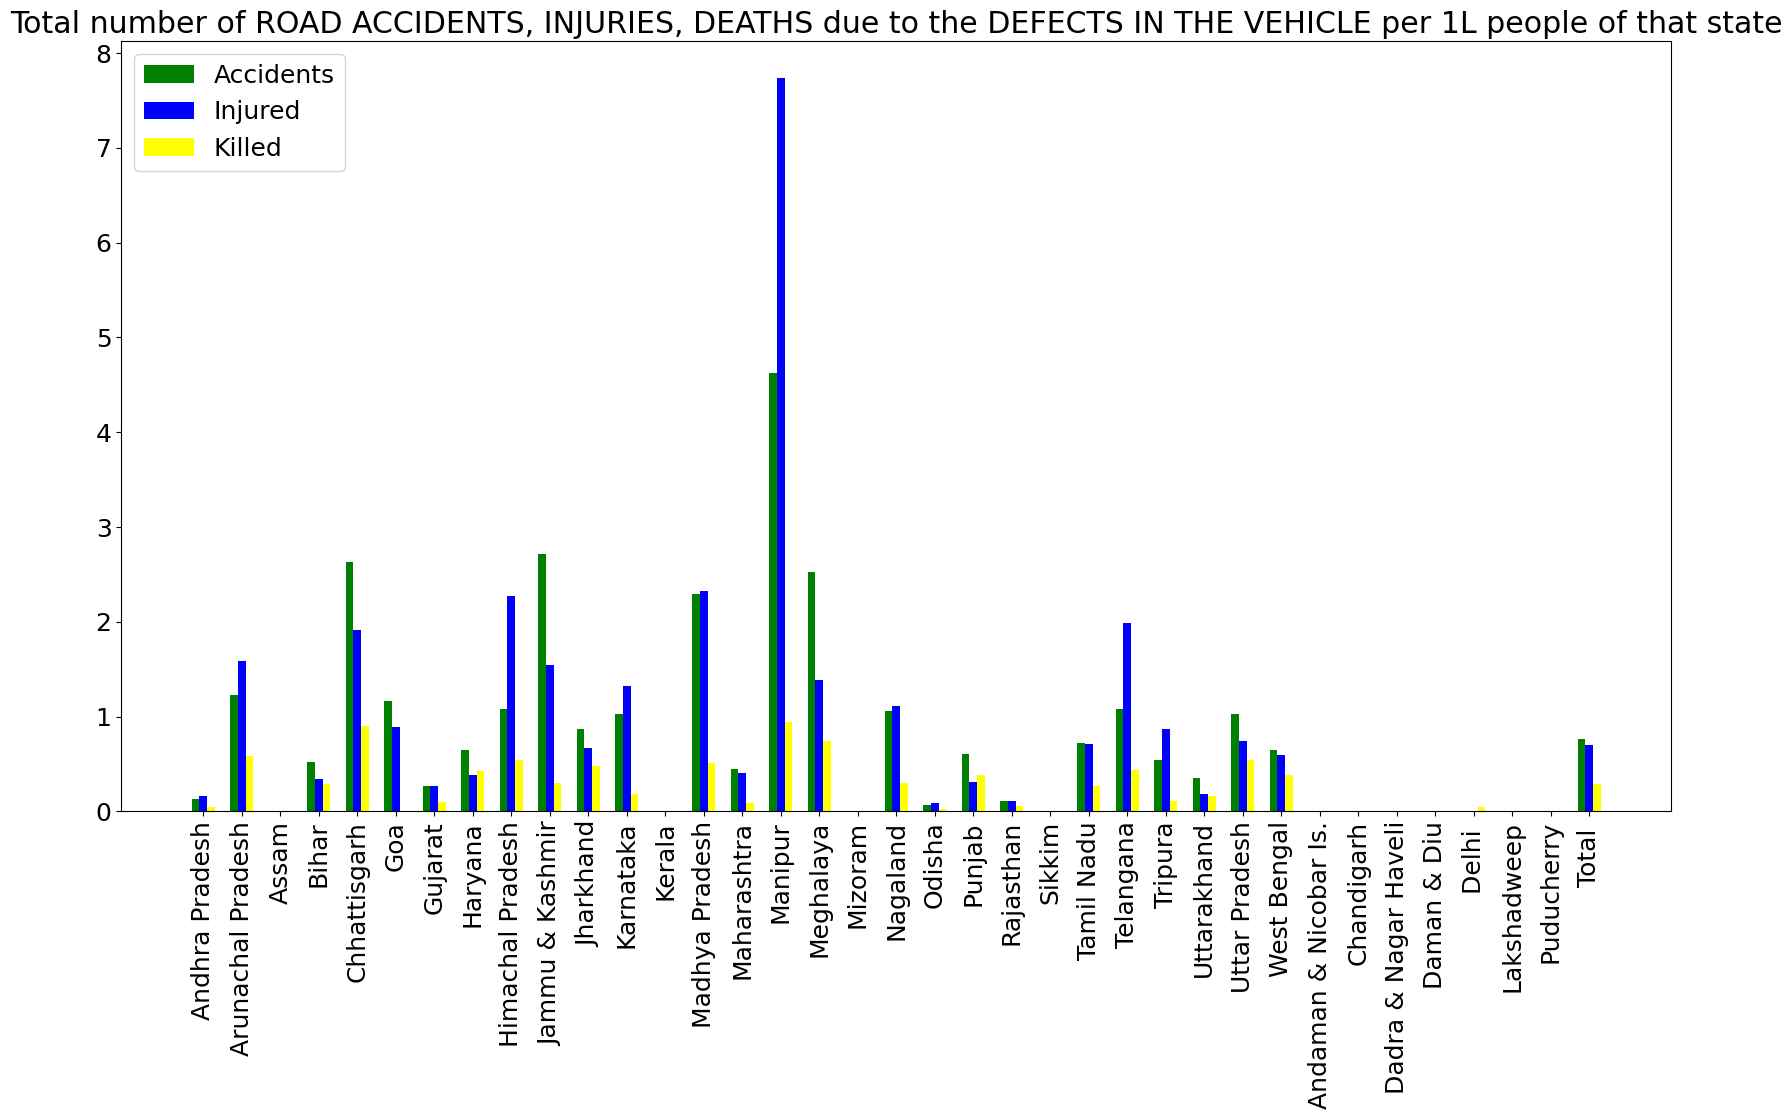

In [110]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state")
plt.show()

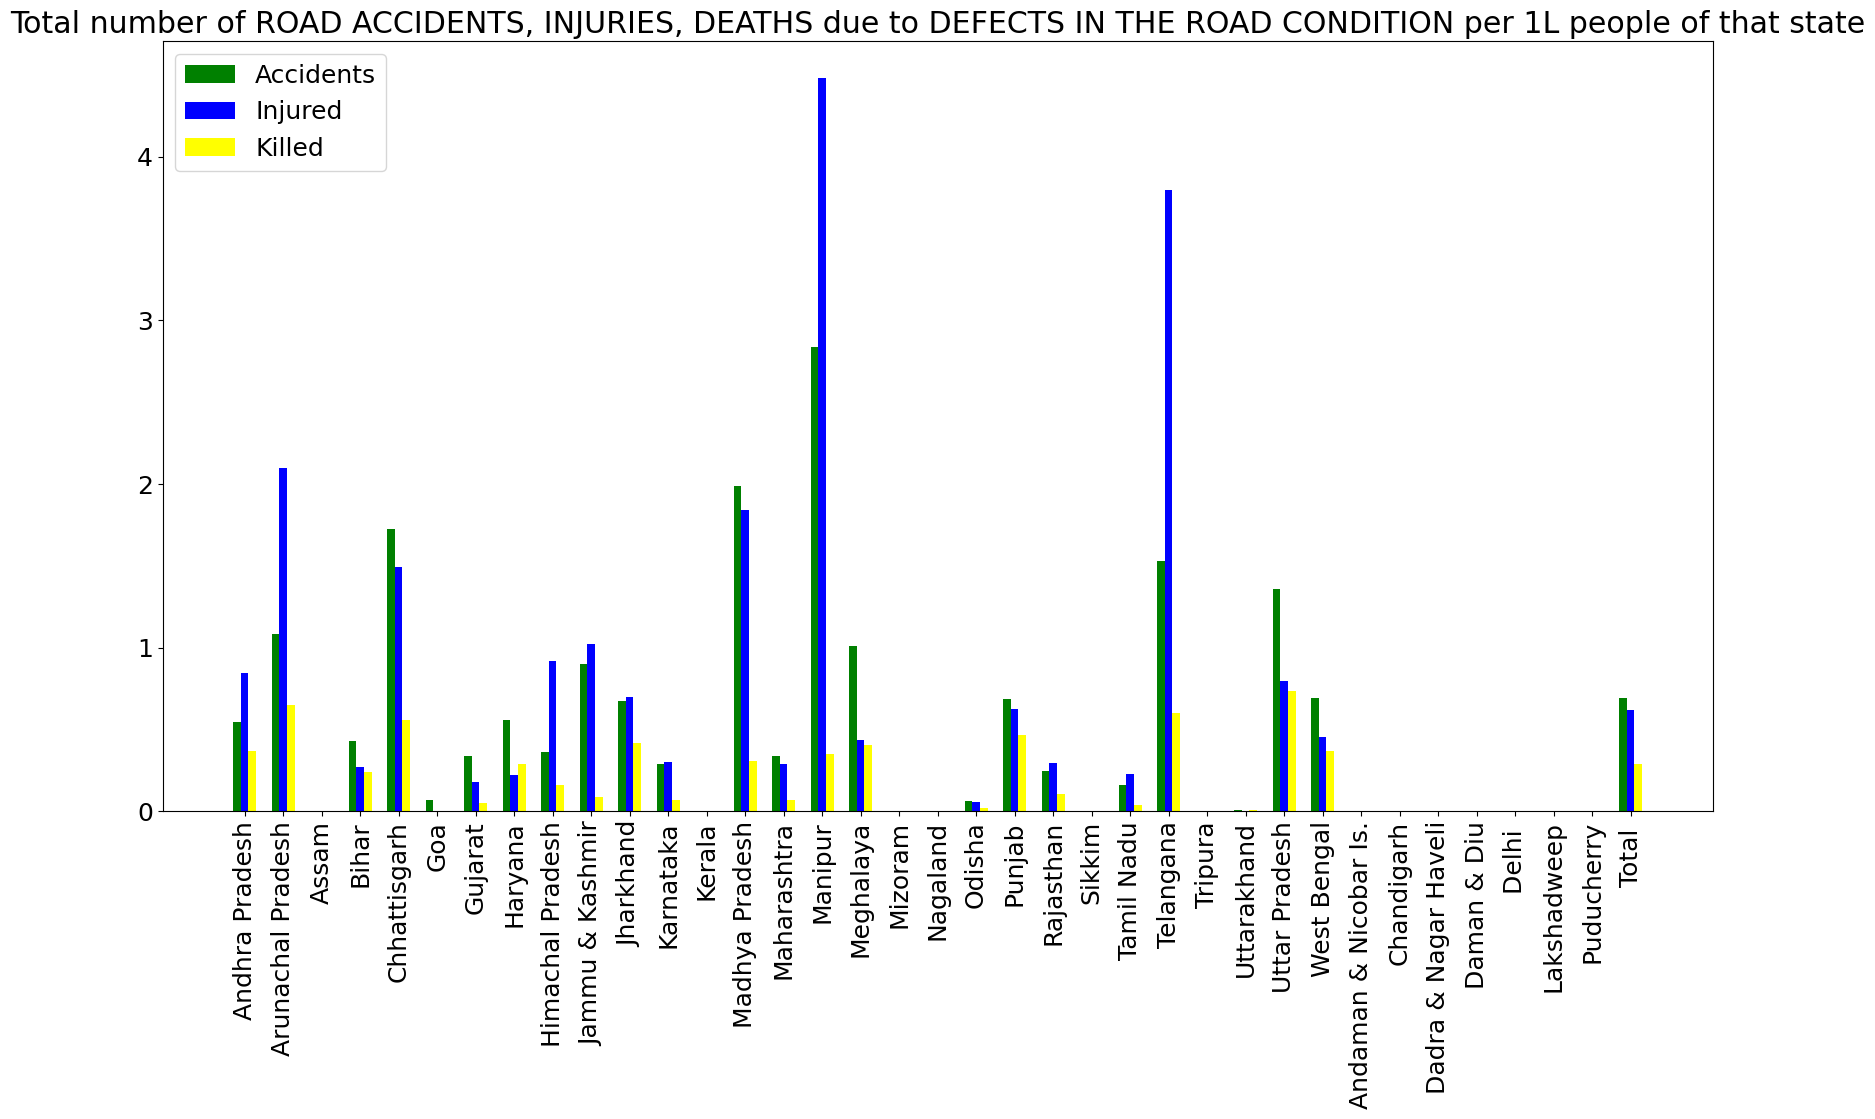

In [111]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state")
plt.show()

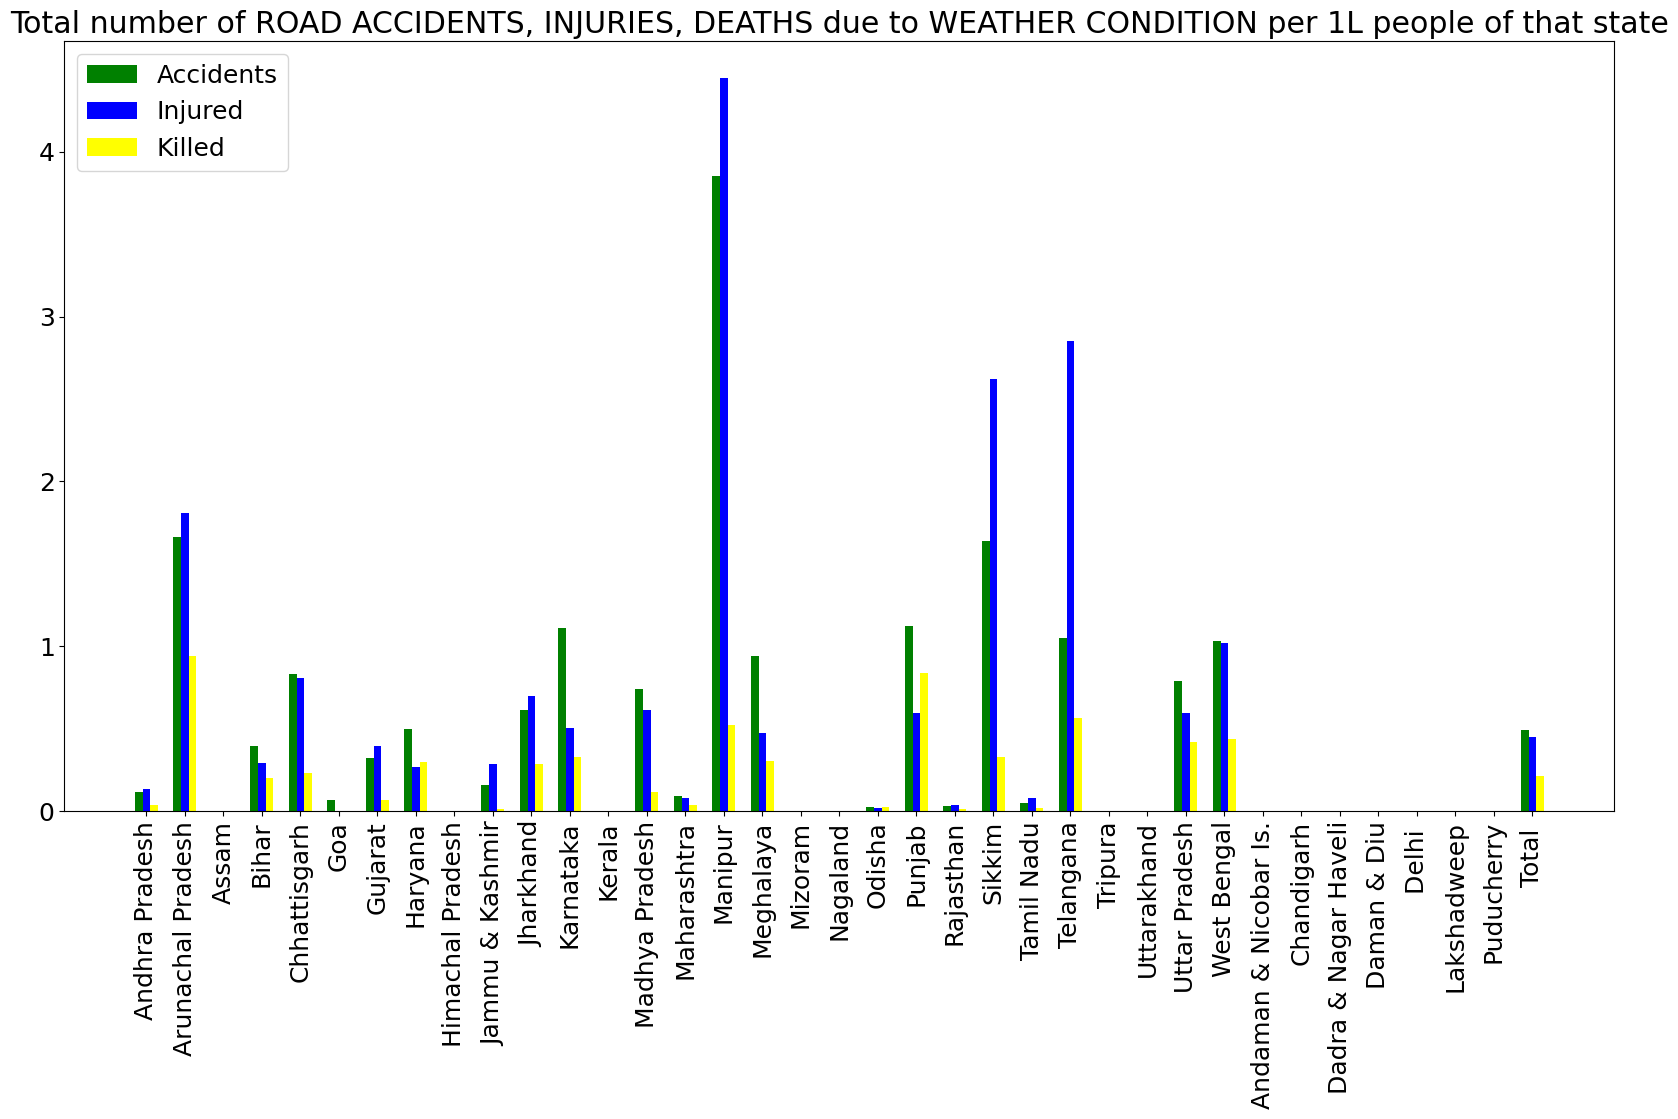

In [112]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state")
plt.show()

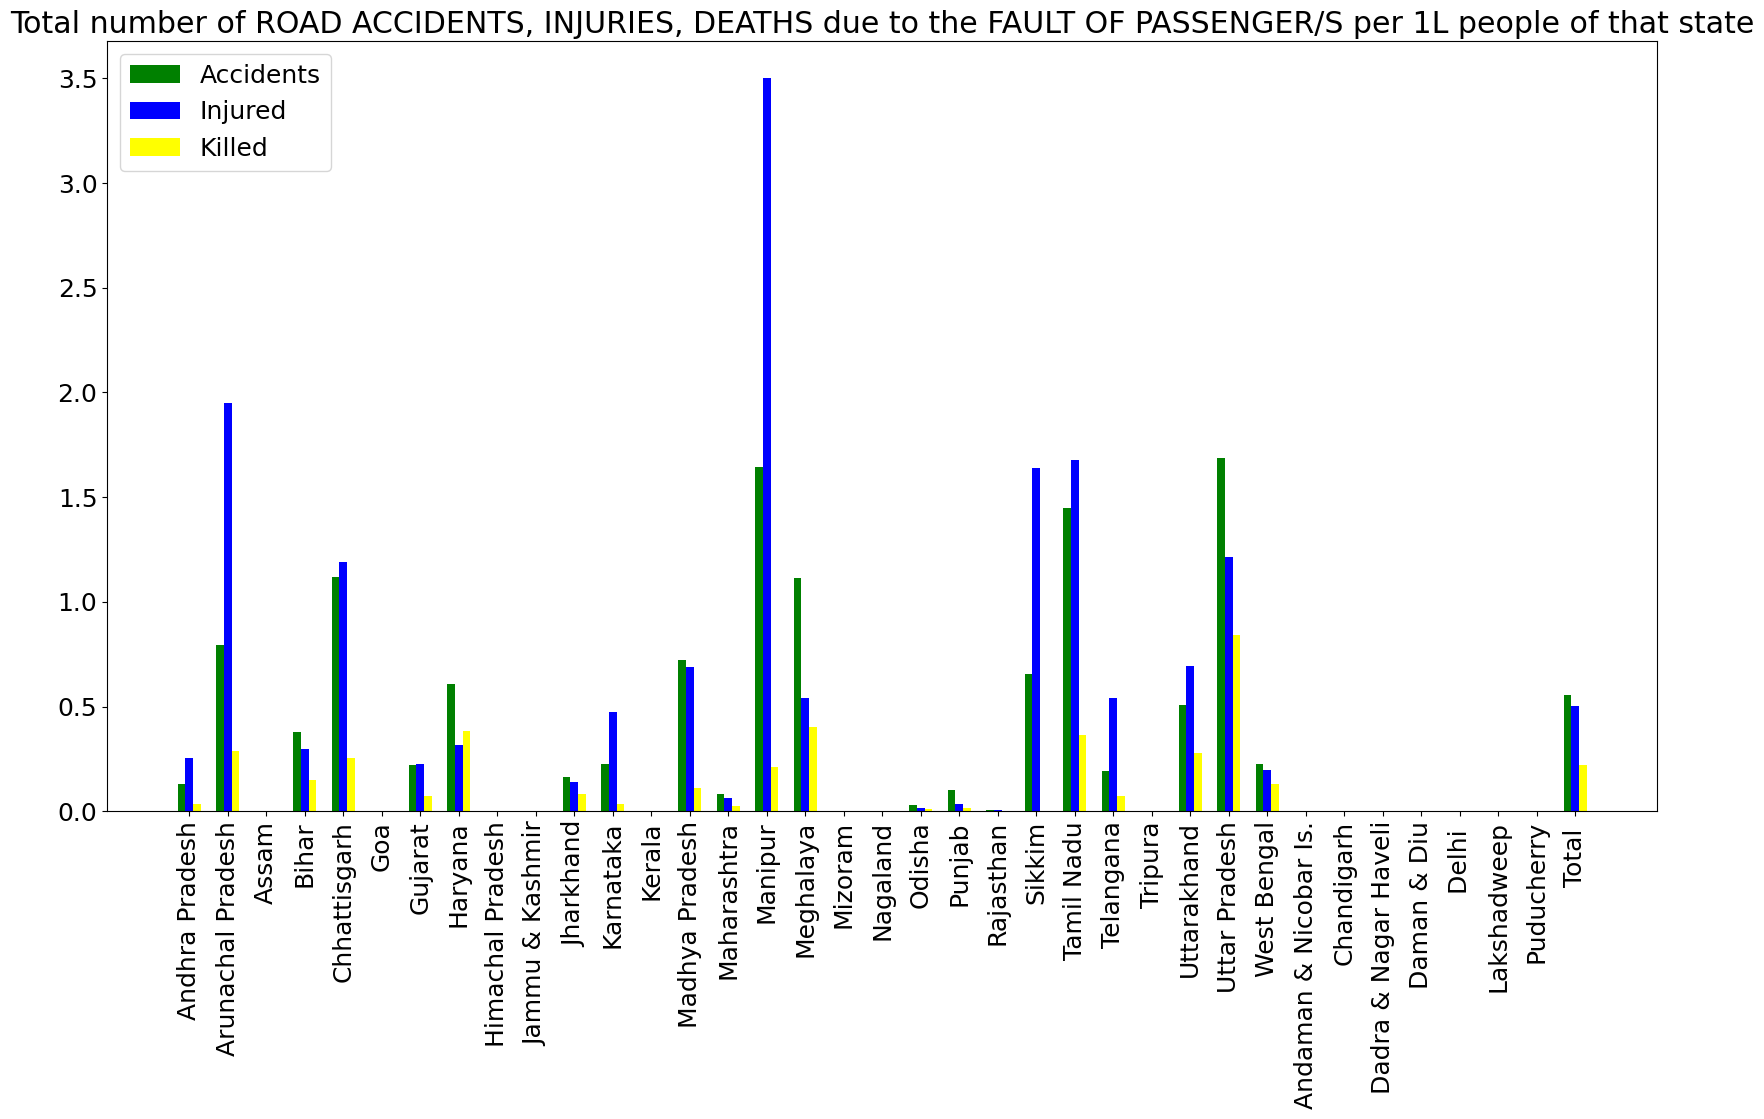

In [113]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PASSENGER/S per 1L people of that state")
plt.show()

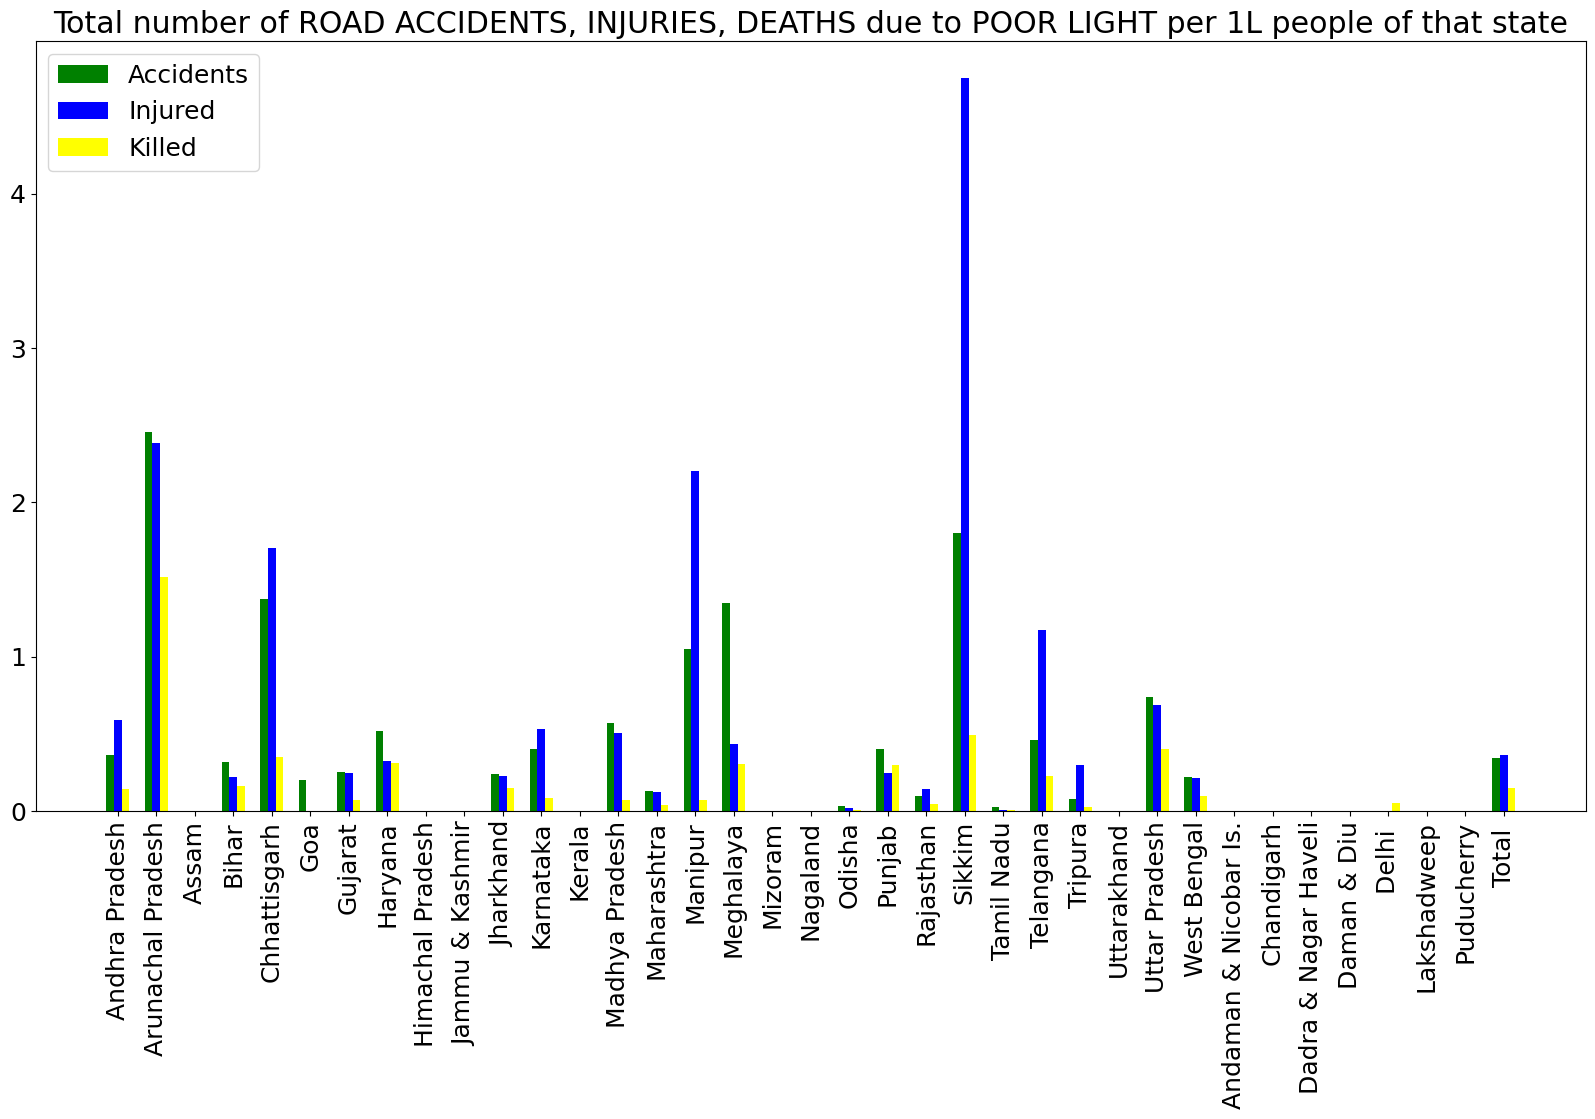

In [114]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Poor light-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Poor light-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to POOR LIGHT per 1L people of that state")
plt.show()

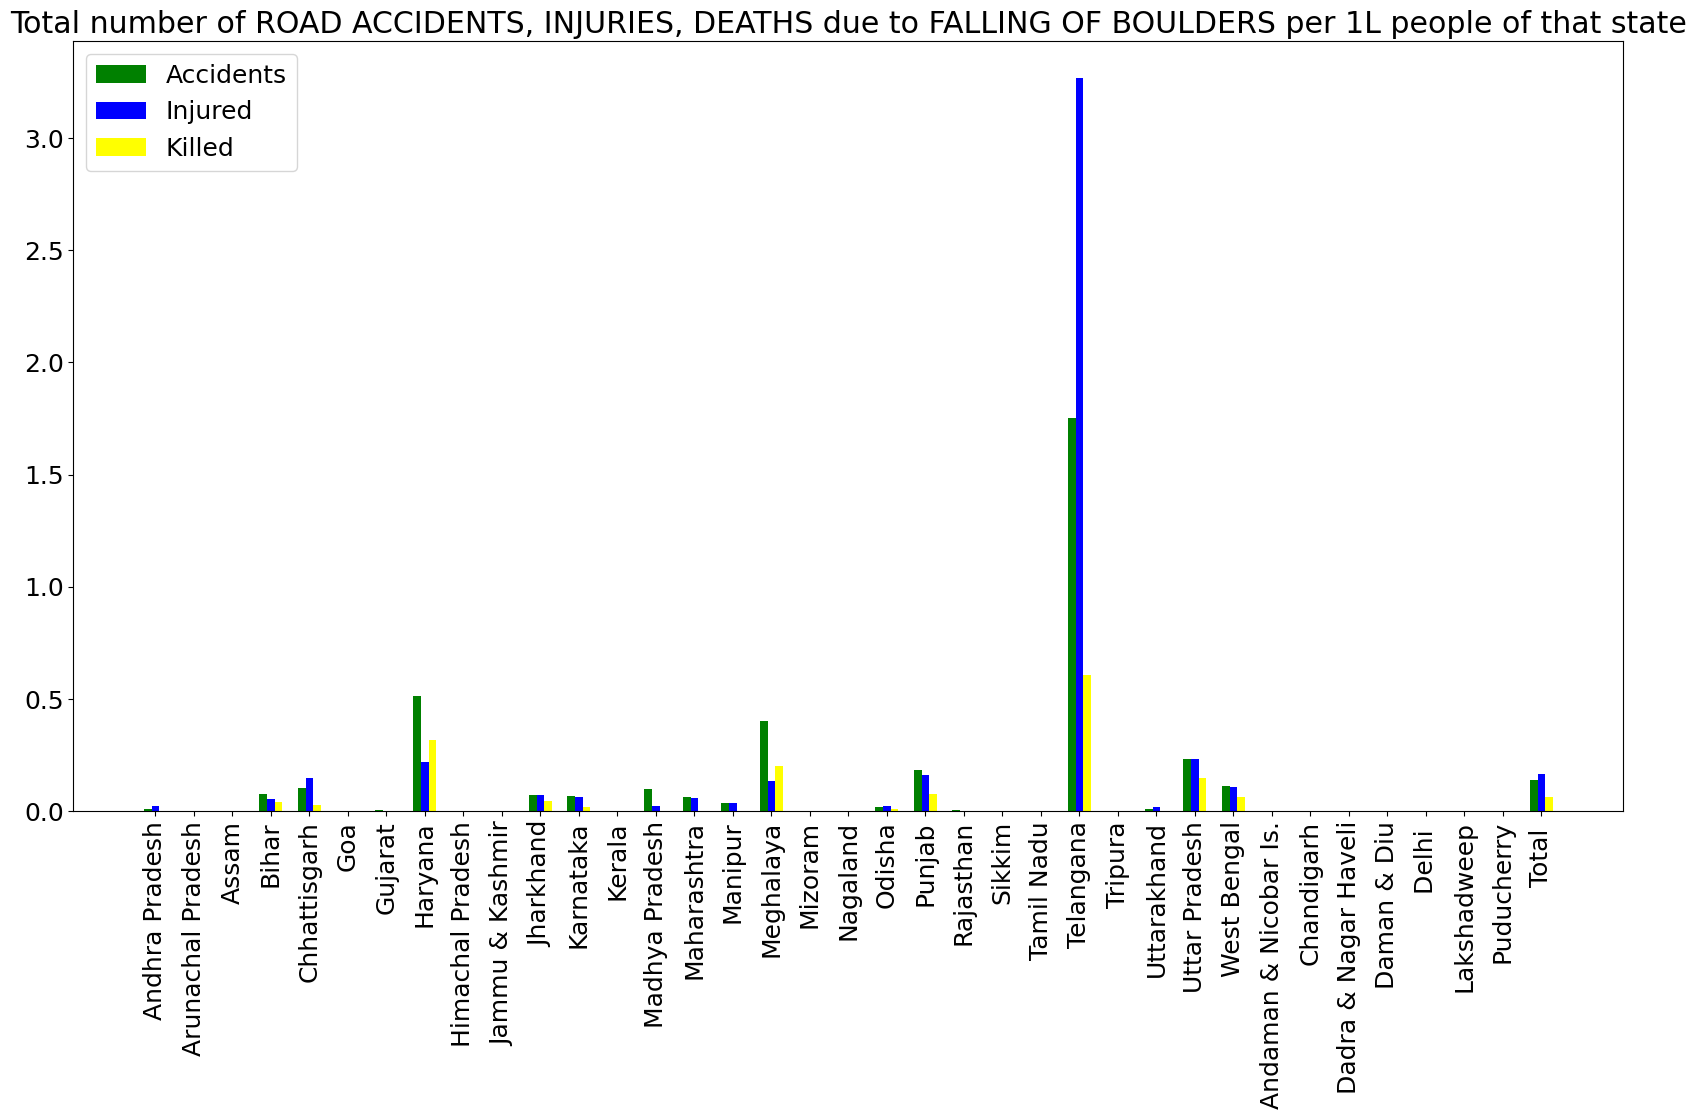

In [115]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FALLING OF BOULDERS per 1L people of that state")
plt.show()

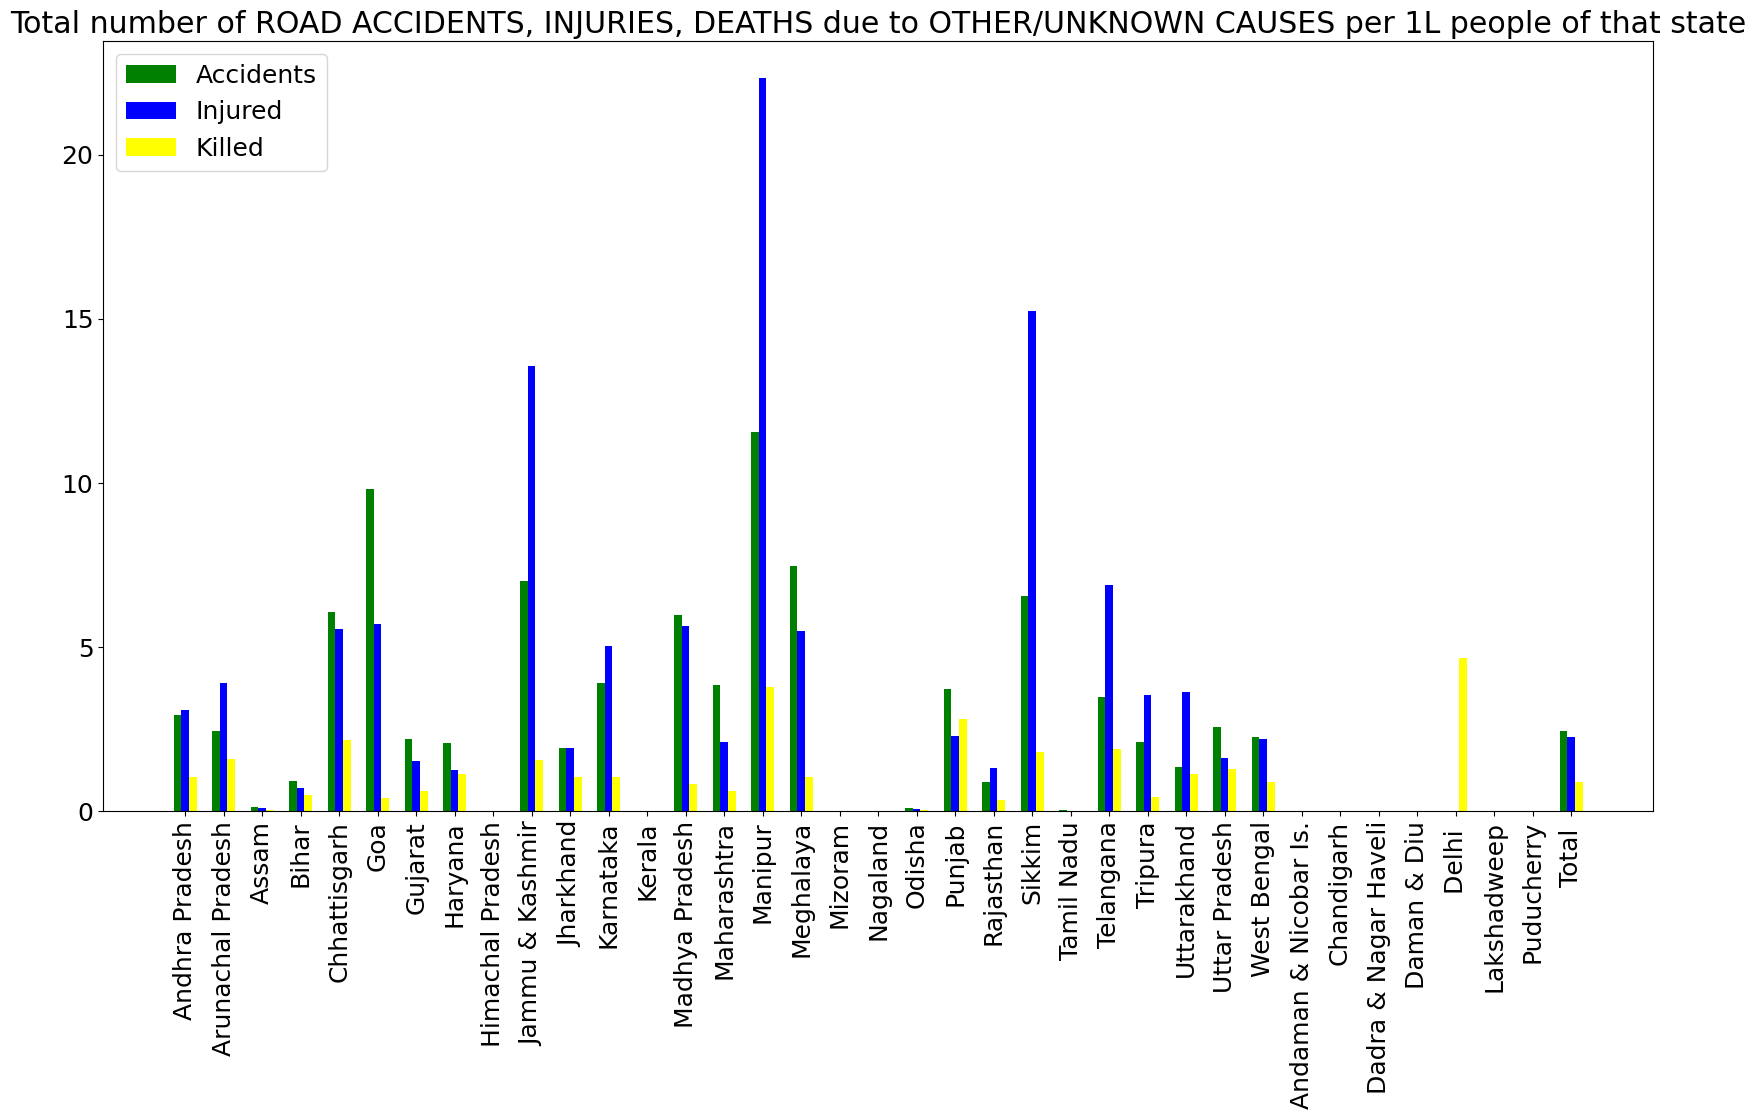

In [116]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to OTHER/UNKNOWN CAUSES per 1L people of that state")
plt.show()

In [117]:
df5['Sum Total Road Accidents - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Poor light-Total No. of Road Accidents - 2014 per 1L people']+df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']+df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']

df5['Sum Total Number of Persons Killed - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Killed - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']

df5['Sum Total Number of Persons Injured - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Injured - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']

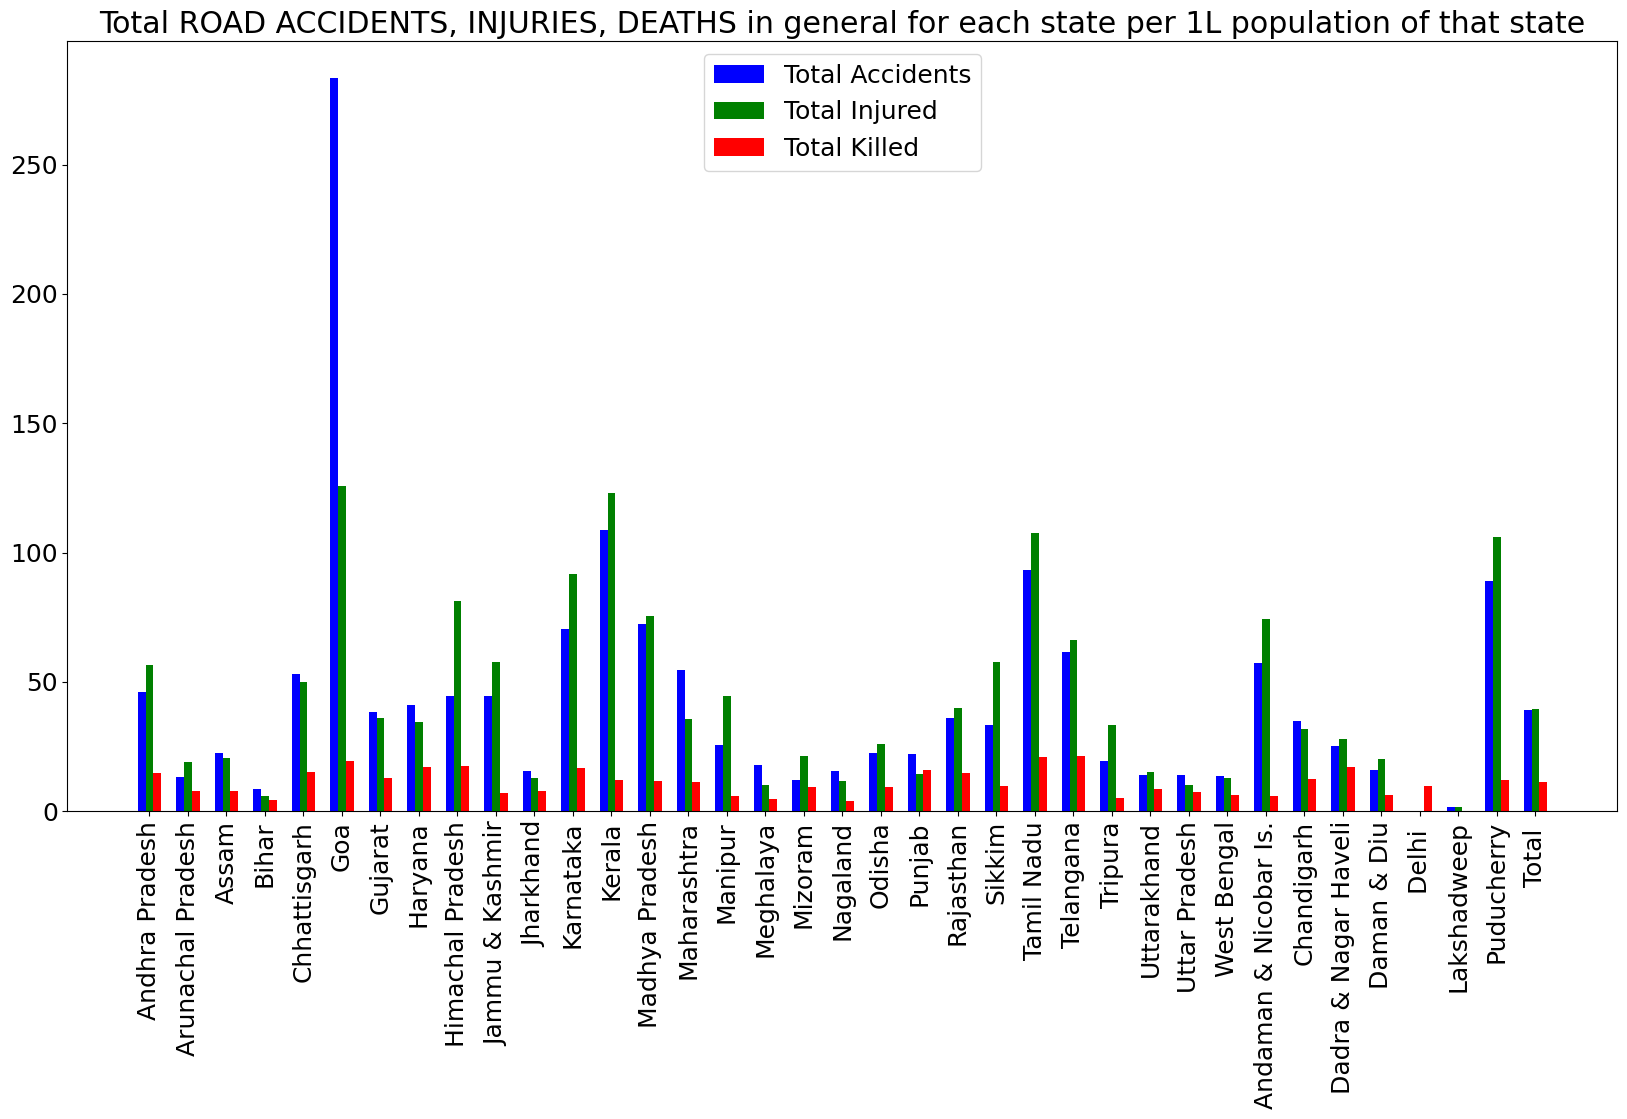

In [118]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT,df5['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Injured')
plt.bar(UT+0.2,df5['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.title("Total ROAD ACCIDENTS, INJURIES, DEATHS in general for each state per 1L population of that state")
plt.legend(loc="best")
plt.show()

*** 
<a id = 'df3'></a>
[Go to top.](#top)

## DF3 - 

This dataset tells how many accidents happen according to the **time of occurence** in different states.


In [122]:
df7 = pd.read_excel('timeOfOccurence.xls')
df7.info()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   S. No.                       37 non-null     object
 1   States/Uts                   37 non-null     object
 2   06-900hrs - Day - 2014       37 non-null     int64 
 3   09-1200hrs - Day - 2014      37 non-null     int64 
 4   12-1500hrs - Day - 2014      37 non-null     int64 
 5   15-1800hrs - Day - 2014      37 non-null     int64 
 6   18-2100hrs - Night - 2014    37 non-null     int64 
 7   21-2400hrs - Night - 2014    37 non-null     int64 
 8   00-300hrs - Night - 2014     37 non-null     int64 
 9   03-600hrs - Night - 2014     37 non-null     int64 
 10  Total Accidents - 2014       37 non-null     int64 
 11  06-900hrs - (Day) - 2016     37 non-null     int64 
 12  09-1200hrs - (Day) - 

C:\Users\khush\AppData\Local\Temp\ipykernel_3224\1679459765.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


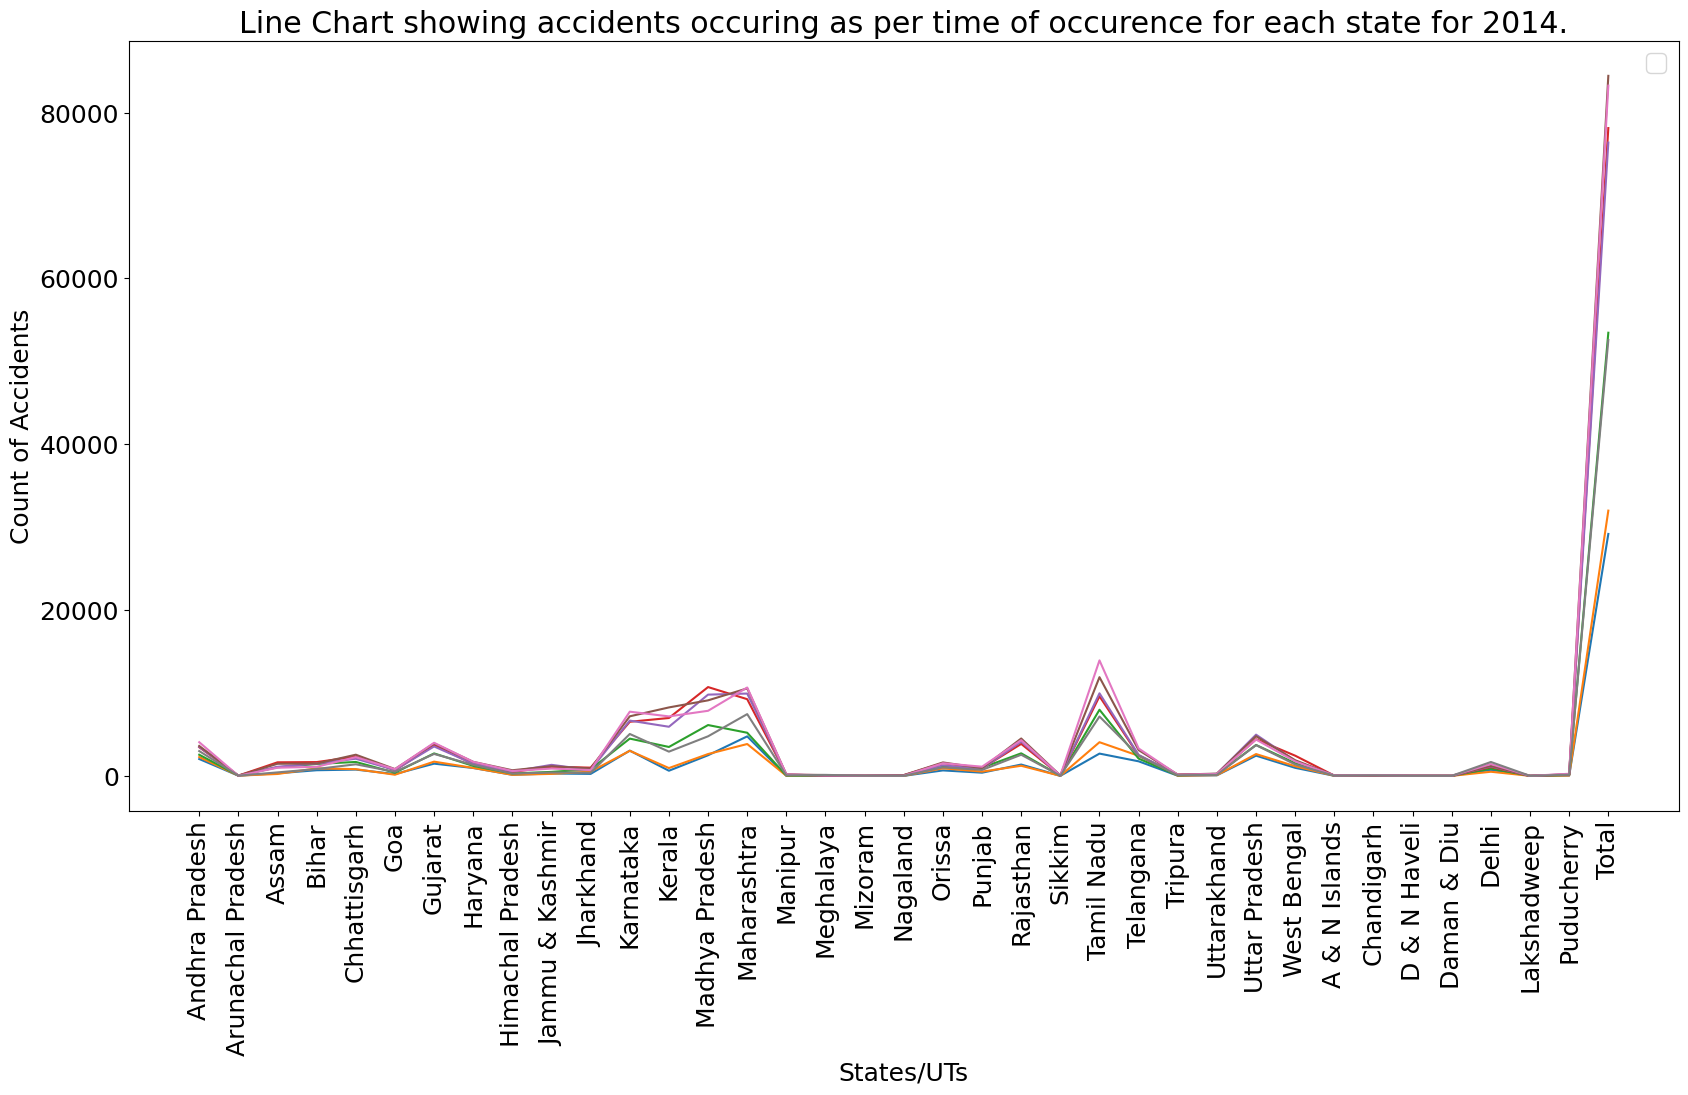

In [123]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], df7['00-300hrs - Night - 2014'] )
plt.plot(df7['03-600hrs - Night - 2014'])
plt.plot(df7['06-900hrs - Day - 2014'])
plt.plot(df7['09-1200hrs - Day - 2014'])
plt.plot(df7['12-1500hrs - Day - 2014'])
plt.plot(df7['15-1800hrs - Day - 2014'])
plt.plot(df7['18-2100hrs - Night - 2014'])
plt.plot(df7['21-2400hrs - Night - 2014'])

plt.title("Line Chart showing accidents occuring as per time of occurence for each state for 2014.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend(loc = 'best')
plt.show()

In [124]:
dayTime2014 = df7['03-600hrs - Night - 2014']+ df7['06-900hrs - Day - 2014'] + \
              df7['09-1200hrs - Day - 2014']+df7['12-1500hrs - Day - 2014']+df7['15-1800hrs - Day - 2014']
nightTime2014 = df7['00-300hrs - Night - 2014'] + df7['18-2100hrs - Night - 2014']+df7['21-2400hrs - Night - 2014']

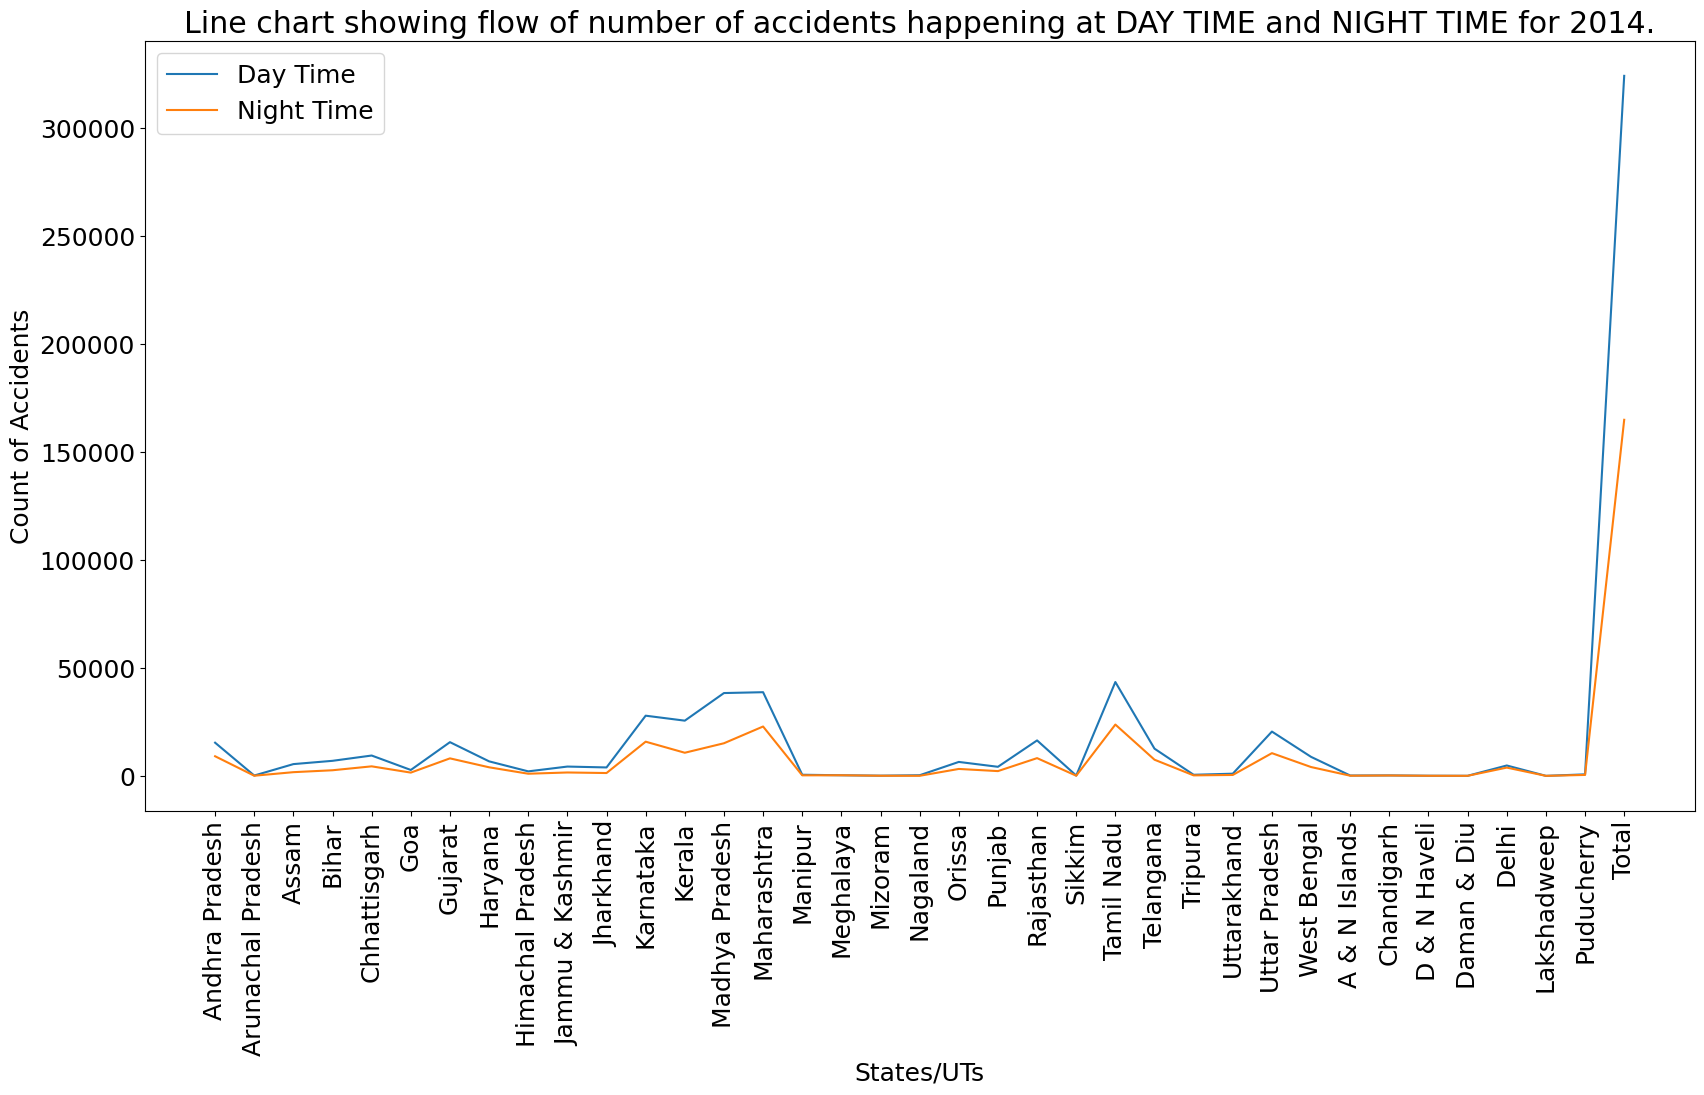

In [125]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2014, label = 'Day Time')
plt.plot(nightTime2014, label = 'Night Time')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2014.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

In [126]:
dayTime2016 = df7['03-600hrs - (Night) - 2016']+ df7['06-900hrs - (Day) - 2016'] + \
              df7['09-1200hrs - (Day) - 2016']+df7['12-1500hrs - (Day) - 2016']+df7['15-1800hrs - (Day) - 2016']
nightTime2016 = df7['00-300hrs - (Night) - 2016'] + df7['18-2100hrs - (Night) - 2016']+df7['21-2400hrs - (Night) - 2016']

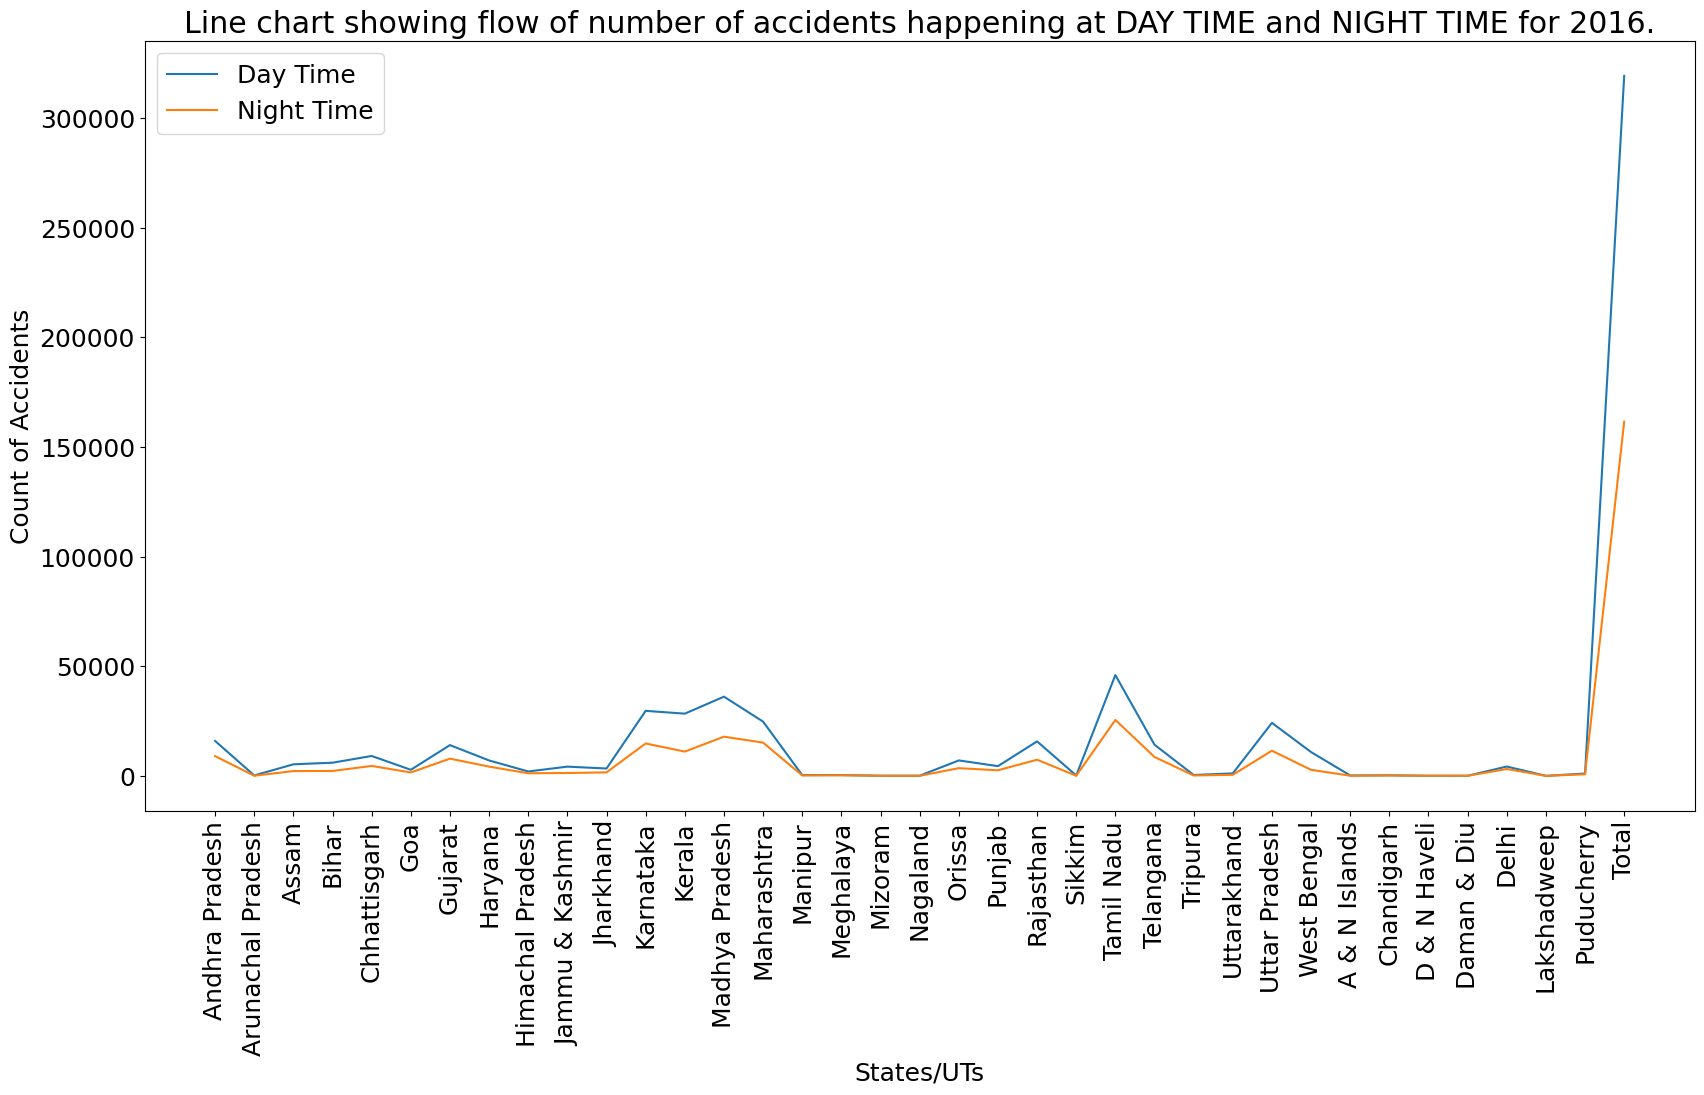

In [127]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2016, label = 'Day Time')
plt.plot(nightTime2016, label = 'Night Time')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2016.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

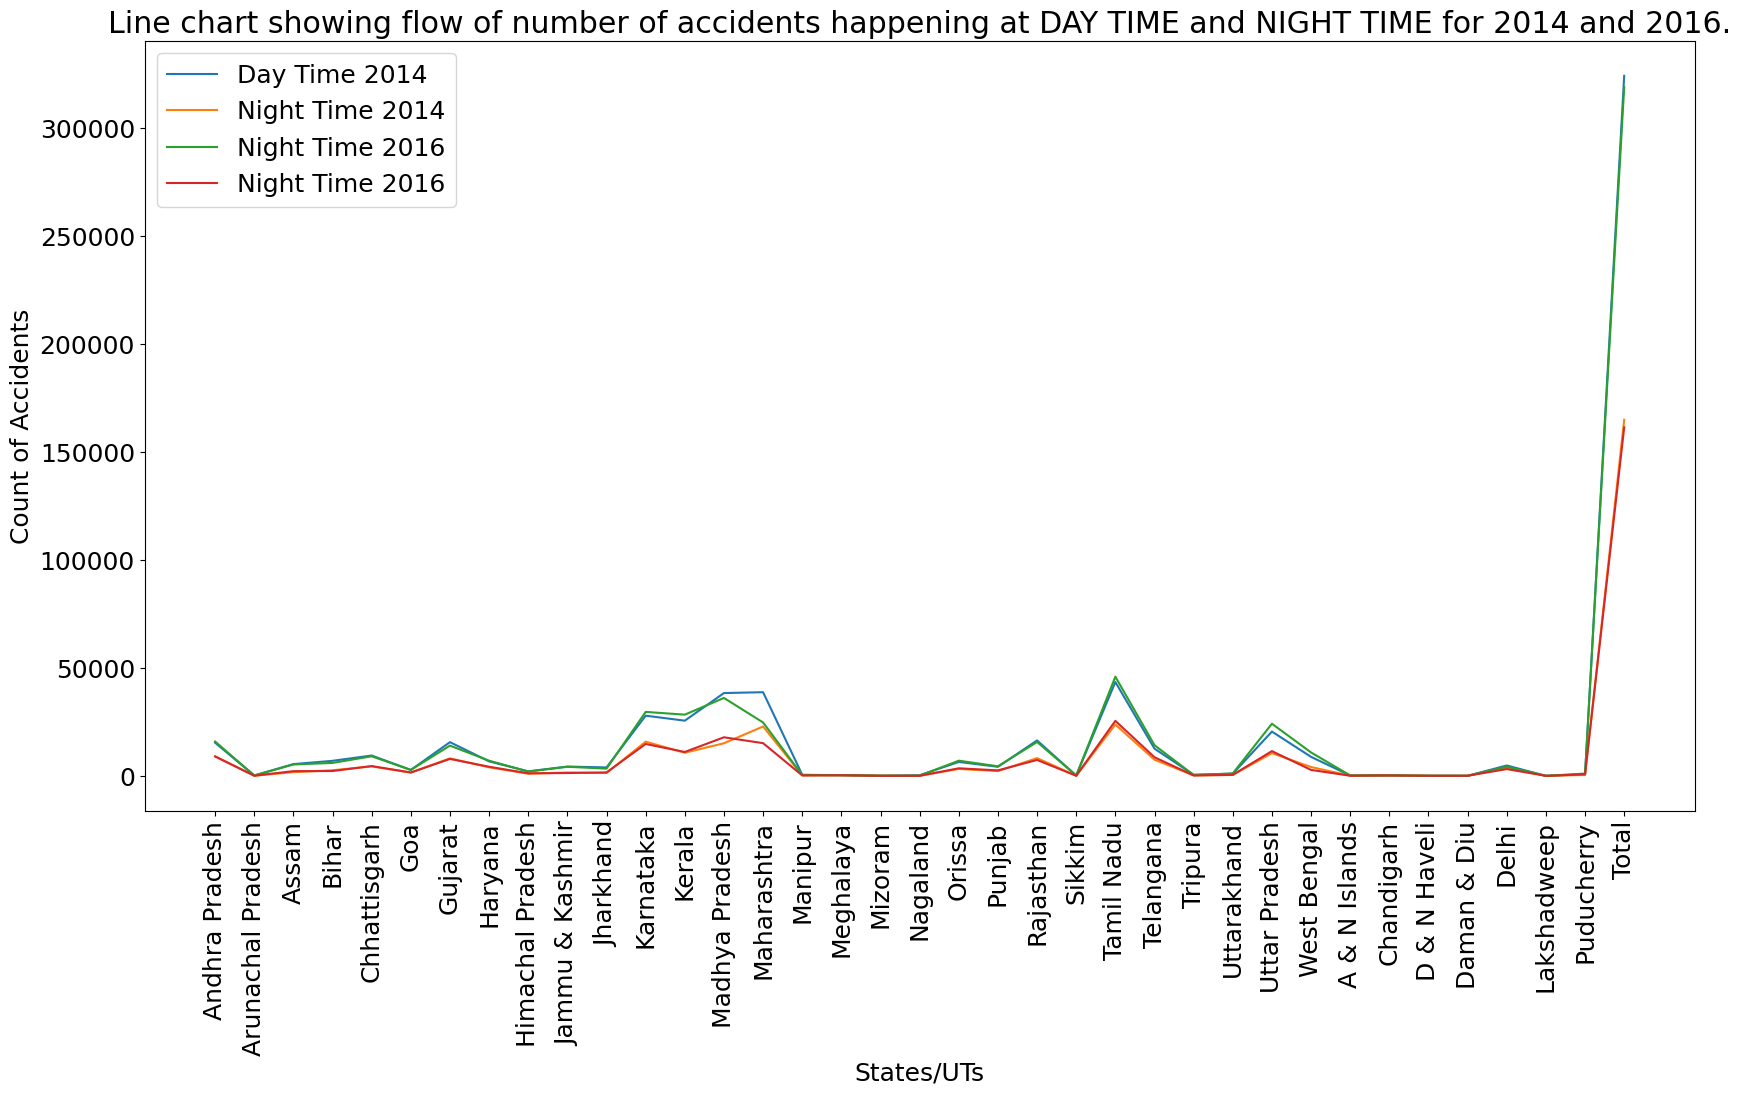

In [128]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2014, label = 'Day Time 2014')
plt.plot(nightTime2014, label = 'Night Time 2014')
plt.plot(dayTime2016, label = 'Night Time 2016')
plt.plot(nightTime2016, label = 'Night Time 2016')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2014 and 2016.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

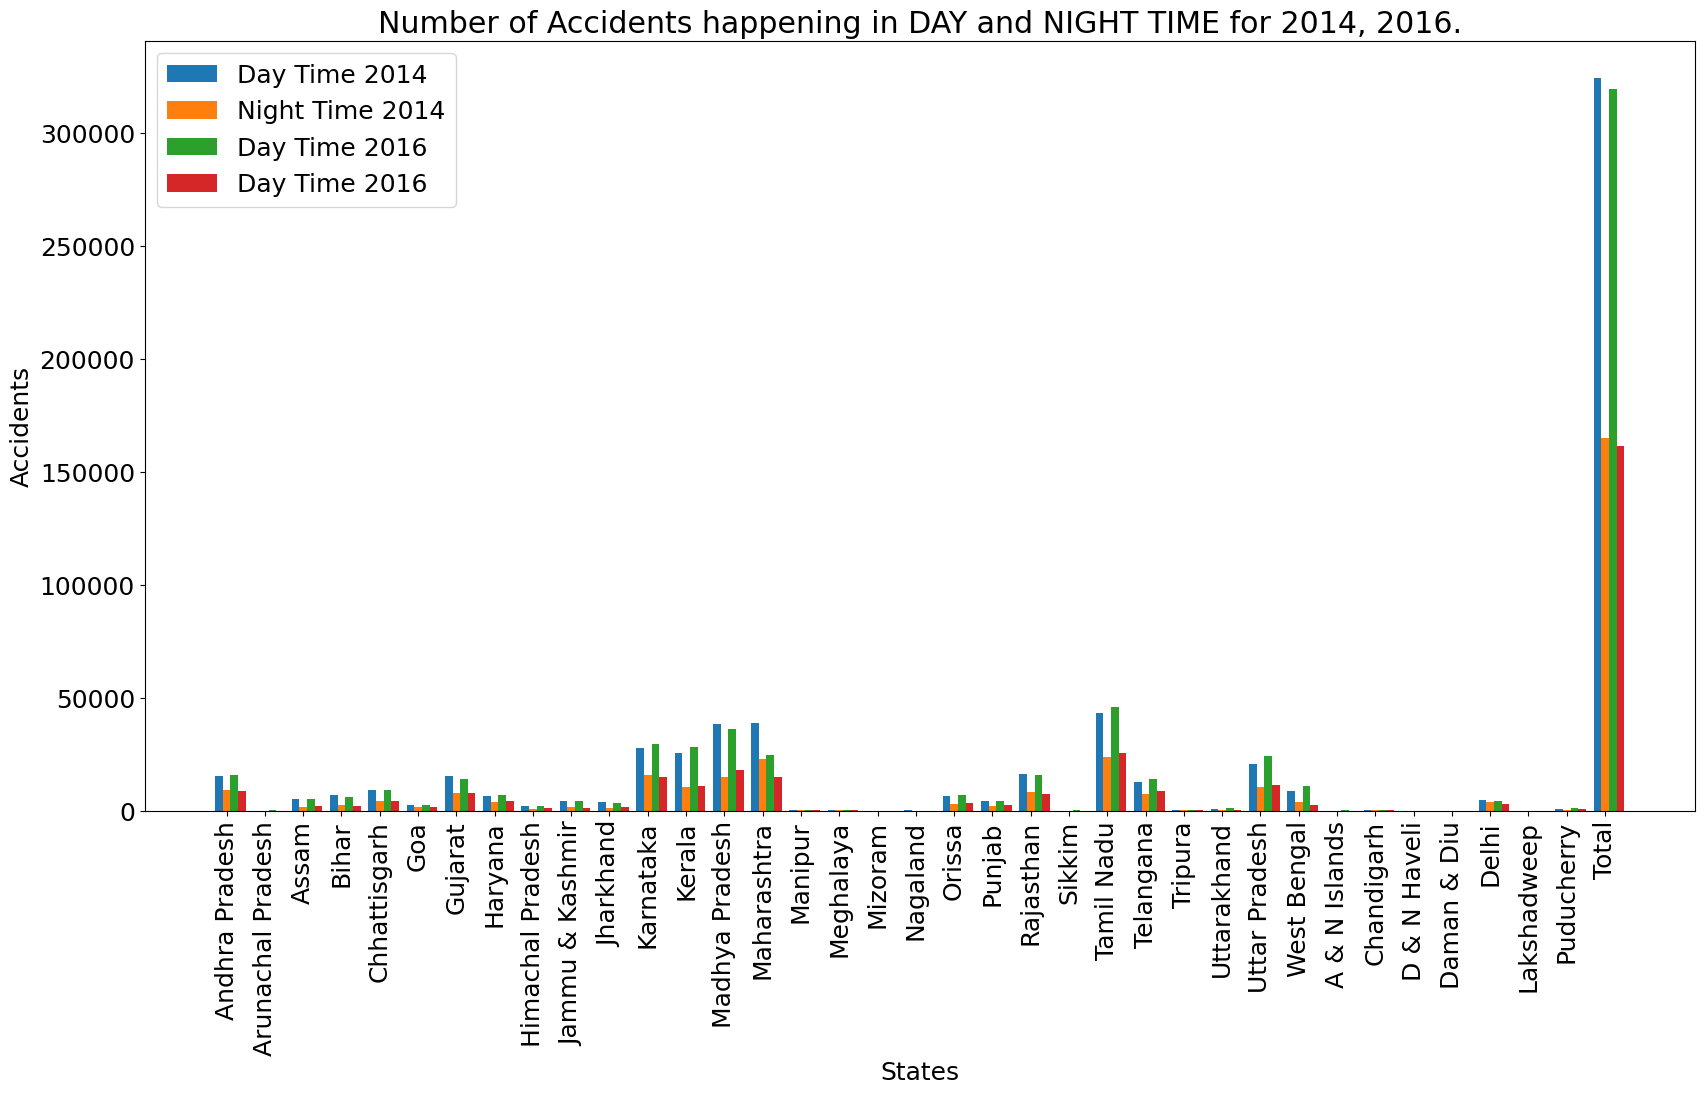

In [129]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.2, dayTime2014, width = 0.2,label = 'Day Time 2014')
plt.bar(UT, nightTime2014, width = 0.2, label = 'Night Time 2014')
plt.bar(UT+0.2, dayTime2016, width = 0.2, label = 'Day Time 2016')
plt.bar(UT+0.4, nightTime2016, width = 0.2, label = 'Day Time 2016')

plt.xlabel("States")
plt.ylabel("Accidents")
plt.legend(loc = 'best')
plt.title("Number of Accidents happening in DAY and NIGHT TIME for 2014, 2016.")
plt.xticks(UT, df7['States/Uts'], rotation=90)
plt.show()